<a href="https://colab.research.google.com/github/Eddythemachine/student_social_media_addiction_ranking/blob/main/student_social_media_addiction_ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STUDENTS' SOCIAL MEDIA ADDICTION
A Cross-Country Survey of Usage Patterns, Academic Impact, and Relationship

# 📊 About Dataset

## 🔍 Overview

The **Student Social Media & Relationships** dataset contains anonymized records of students’ social media behaviors and related life outcomes. It spans multiple countries and academic levels, focusing on key dimensions such as **usage intensity**, **platform preferences**, and **relationship dynamics**.

Each row represents one student’s survey response, offering a cross‐sectional snapshot suitable for **statistical analysis** and **machine learning** applications.

---

## 🌍 Scope & Coverage

* **Population**: Students aged **16–25** enrolled in **high school**, **undergraduate**, or **graduate** programs.
* **Geography**: Multi‐country coverage (e.g., **Bangladesh, India, USA, UK, Canada, Australia, Germany, Brazil, Japan, South Korea**)
* **Timeframe**: Data collected via a **one‐time online survey** administered in **Q1 2025**
* **Volume**: Configurable sample sizes (e.g., **100**, **500**, **1,000 records**) based on research needs

---

## 🧪 Data Collection & Methodology

* **Survey Design**:
  Adapted from validated scales like the **Bergen Social Media Addiction Scale** and relationship conflict indices.

* **Recruitment**:
  Participants were recruited via **university mailing lists** and **social media platforms**, ensuring diversity.

* **Data Quality Controls**:

  * **Validation**: Mandatory fields and value range checks (e.g., 0–24 usage hours)
  * **De‐duplication**: Based on unique `Student_ID`
  * **Anonymization**: No personally identifiable information collected

---

## 📌 Key Variables

| Variable                       | Type        | Description                                |
| ------------------------------ | ----------- | ------------------------------------------ |
| `Student_ID`                   | Integer     | Unique respondent identifier               |
| `Age`                          | Integer     | Age in years                               |
| `Gender`                       | Categorical | “Male” or “Female”                         |
| `Academic_Level`               | Categorical | High School / Undergraduate / Graduate     |
| `Country`                      | Categorical | Country of residence                       |
| `Avg_Daily_Usage_Hours`        | Float       | Avg. hours/day on social media             |
| `Most_Used_Platform`           | Categorical | Instagram, Facebook, TikTok, etc.          |
| `Affects_Academic_Performance` | Boolean     | Self-reported impact on academics (Yes/No) |
| `Sleep_Hours_Per_Night`        | Float       | Average nightly sleep hours                |
| `Mental_Health_Score`          | Integer     | 1 = poor, 10 = excellent                   |
| `Relationship_Status`          | Categorical | Single / In Relationship / Complicated     |
| `Conflicts_Over_Social_Media`  | Integer     | Number of conflicts due to social media    |
| `Addicted_Score`               | Integer     | 1 = low, 10 = high addiction level         |

---

## 🔎 Potential Analyses

* **Correlation Studies**:
  Analyze links between **usage hours** and **mental health** or **sleep**.

* **Predictive Modeling**:
  Classify likelihood of **relationship conflicts** from platform usage.

* **Clustering**:
  Identify user groups, e.g.,

  * “High‐usage high‐stress”
  * “Moderate‐usage balanced”

---

## ⚠️ Limitations

* **Self‐Report Bias**: Responses may be affected by social-desirability.
* **Cross‐Sectional Design**: One‐time snapshot limits causal claims.
* **Sampling Variability**: May underrepresent students with **limited internet access**.



# IMPORTING LIBARIES

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# LOADING DATASET

In [2]:
url = "Students Social Media Addiction.csv"
df  = pd.read_csv(url)

# EXPLORATORY DATA ANALYSIS

In [3]:
# Dataset Head
df.head()

Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Social_Media  \
0                    6     In Relationship                            3   
1                    8              Single                            0   
2                    5         Complicated                            4   
3                    7              Single                            1   
4                    6     In Relationship                            2   

   Addicted_Score  
0               8  
1               3  
2               9  
3               4  
4               7

## Column Descriptions

### `Student_ID`
A unique integer identifier assigned to each survey respondent to enable de-duplication and track individual records without revealing personal information.

### `Age`
The student’s age in completed years at the time of the survey, used to segment analysis by age group and control for developmental differences.

### `Gender`
The student’s self-reported gender, recorded as “Male” or “Female” to allow for demographic breakdowns in usage and outcome measures.

### `Academic_Level`
The highest level of education the respondent is currently enrolled in, with categories: “High School,” “Undergraduate,” or “Graduate,” facilitating stratified analyses by academic stage.

### `Country`
The country of residence where the student completed the survey, enabling cross-country comparisons of social media behaviors and impacts.

### `Avg_Daily_Usage_Hours`
The average number of hours per day the student spends on social media platforms, calculated from self-reported weekday and weekend usage estimates.

### `Most_Used_Platform`
The social media platform on which the student spends the most time (e.g., Instagram, Facebook, TikTok), used to examine platform-specific effects.

### `Affects_Academic_Performance`
A binary indicator (“Yes”/“No”) reflecting whether the student perceives their social media use as having a negative impact on their academic performance.

### `Sleep_Hours_Per_Night`
The respondent’s average nightly sleep duration in hours, provided to investigate correlations between screen time and sleep quality/quantity.

### `Mental_Health_Score`
A self-rated integer from 1 (poor) to 10 (excellent) indicating overall mental well-being, allowing assessment of potential associations with social media habits.

### `Relationship_Status`
The student’s current romantic relationship status, categorized as “Single,” “In Relationship,” or “Complicated,” to explore social media’s impact on interpersonal dynamics.

### `Conflicts_Over_Social_Media`
The number of arguments or disagreements the student reports having had with family, friends, or partners due to their social media use, serving as a proxy for social friction.

### `Addicted_Score`
A composite score from 1 (low addiction) to 10 (high addiction) based on a standardized survey scale (e.g., Bergen Social Media Addiction Scale), quantifying the degree of problematic usage.


In [4]:
# DataSet Description
df.describe()

Student_ID         Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  \
count  705.000000  705.000000             705.000000             705.000000   
mean   353.000000   20.659574               4.918723               6.868936   
std    203.660256    1.399217               1.257395               1.126848   
min      1.000000   18.000000               1.500000               3.800000   
25%    177.000000   19.000000               4.100000               6.000000   
50%    353.000000   21.000000               4.800000               6.900000   
75%    529.000000   22.000000               5.800000               7.700000   
max    705.000000   24.000000               8.500000               9.600000   

       Mental_Health_Score  Conflicts_Over_Social_Media  Addicted_Score  
count           705.000000                   705.000000      705.000000  
mean              6.226950                     2.849645        6.436879  
std               1.105055                     0.957968        1.587165  
min               4.000000                     0.000000        2.000000  
25%               5.000000                     2.000000        5.000000  
50%               6.000000                     3.000000        7.000000  
75%               7.000000                     4.000000        8.000000  
max               9.000000                     5.000000        9.000000

In [5]:
# DataSet Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [6]:
# DataSet shape
df.shape

(705, 13)

In [7]:
# Checking for null values
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [8]:
# Unique items in dataset
df.nunique()

Student_ID                      705
Age                               7
Gender                            2
Academic_Level                    3
Country                         110
Avg_Daily_Usage_Hours            67
Most_Used_Platform               12
Affects_Academic_Performance      2
Sleep_Hours_Per_Night            59
Mental_Health_Score               6
Relationship_Status               3
Conflicts_Over_Social_Media       6
Addicted_Score                    8
dtype: int64

In [9]:
# Checking for duplicate items
df.duplicated().sum()

np.int64(0)

In [10]:
# DataSet data types
df.dtypes

Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object

In [11]:
# Dropping Studenet_ID
df.drop("Student_ID", axis=1, inplace=True)

In [12]:
df.head()

Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0   19  Female  Undergraduate  Bangladesh                    5.2   
1   22    Male       Graduate       India                    2.1   
2   20  Female  Undergraduate         USA                    6.0   
3   18    Male    High School          UK                    3.0   
4   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Social_Media  \
0                    6     In Relationship                            3   
1                    8              Single                            0   
2                    5         Complicated                            4   
3                    7              Single                            1   
4                    6     In Relationship                            2   

   Addicted_Score  
0               8  
1               3  
2               9  
3               4  
4               7

In [13]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Target column
target_column = df["Addicted_Score"]

# Drop the "Addicted_Score" column from the copy
df_copy.drop("Addicted_Score", axis=1, inplace=True)

# Identify categorical and numerical columns
mask = df_copy.dtypes == object
categorical_cols = df_copy.columns[mask]
numerical_cols = df_copy.columns[~mask]

In [14]:
print(categorical_cols)
print("-----------------------------------------------------------")
print(numerical_cols)
print("-----------------------------------------------------------")
print(target_column)

Index(['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Relationship_Status'],
      dtype='object')
-----------------------------------------------------------
Index(['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Conflicts_Over_Social_Media'],
      dtype='object')
-----------------------------------------------------------
0      8
1      3
2      9
3      4
4      7
      ..
700    5
701    9
702    7
703    4
704    8
Name: Addicted_Score, Length: 705, dtype: int64


## Univariate Analysis

In [15]:
# Function to print unique items
def print_unique_items(df):
    for col in df.columns:
        print(f"Unique items in {col}:")
        print(df[col].unique())

### Average Daily Usage Hours Rounding Up

In [16]:
# Min Average Daily Usage Hours
print(df['Avg_Daily_Usage_Hours'].min())

# Max Average Daily Usage Hours
print(df['Avg_Daily_Usage_Hours'].max())

# Define a custom rounding function:
# - If decimal part is less than 0.5 → round down
# - If decimal part is 0.5 or more → round up
def custom_round(x):
    if x % 1 < 0.5:
        return int(np.floor(x))
    else:
        return int(np.ceil(x))

# Apply the function to create a new column
df_copy['Avg_Daily_Usage_Hours'] = df_copy['Avg_Daily_Usage_Hours'].apply(custom_round)

1.5
8.5


In [17]:
print_unique_items(df_copy[numerical_cols])

Unique items in Age:
[19 22 20 18 21 23 24]
Unique items in Avg_Daily_Usage_Hours:
[5 2 6 3 7 4 8 9]
Unique items in Sleep_Hours_Per_Night:
[6.5 7.5 5.  7.  6.  4.5 8.  6.2 5.8 7.2 5.5 6.8 7.8 5.7 6.7 5.9 7.3 5.4
 6.9 5.2 6.6 7.4 5.3 5.1 7.1 5.6 6.4 6.3 6.1 7.6 7.7 7.9 8.1 8.2 8.3 4.9
 8.4 4.8 8.5 4.7 8.6 4.6 4.4 8.7 4.3 8.8 4.2 8.9 4.1 9.  9.1 9.2 9.3 9.4
 4.  9.5 3.9 9.6 3.8]
Unique items in Mental_Health_Score:
[6 8 5 7 4 9]
Unique items in Conflicts_Over_Social_Media:
[3 0 4 1 2 5]


In [18]:
df_copy['Avg_Daily_Usage_Hours'].nunique()

8

In [19]:
# Min Sleep_Hours_Per_Night
print(df['Sleep_Hours_Per_Night'].min())

# Max Sleep_Hours_Per_Night
print(df['Sleep_Hours_Per_Night'].max())

# Rounding up Sleep_Hours_Per_Night
df_copy["Sleep_Hours_Per_Night"] = df_copy["Sleep_Hours_Per_Night"].apply(custom_round)
print(df_copy["Sleep_Hours_Per_Night"].unique())

3.8
9.6
[ 7  8  5  6  9  4 10]


In [20]:
print_unique_items(df_copy[numerical_cols])

Unique items in Age:
[19 22 20 18 21 23 24]
Unique items in Avg_Daily_Usage_Hours:
[5 2 6 3 7 4 8 9]
Unique items in Sleep_Hours_Per_Night:
[ 7  8  5  6  9  4 10]
Unique items in Mental_Health_Score:
[6 8 5 7 4 9]
Unique items in Conflicts_Over_Social_Media:
[3 0 4 1 2 5]


In [24]:
def plot_histogram_with_kde_and_counts(df, column_name):
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column_name, bins=10, kde=True, color='skyblue')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

    # Get the exact counts for each unique value in the column
    value_counts = df[column_name].value_counts().sort_index()

    print(f"\n--- Exact Counts for {column_name} ---")
    for value, count in value_counts.items():
        print(f"Value {value}: {count}")
    print("------------------------------------\n")

    return value_counts # Optionally return the count

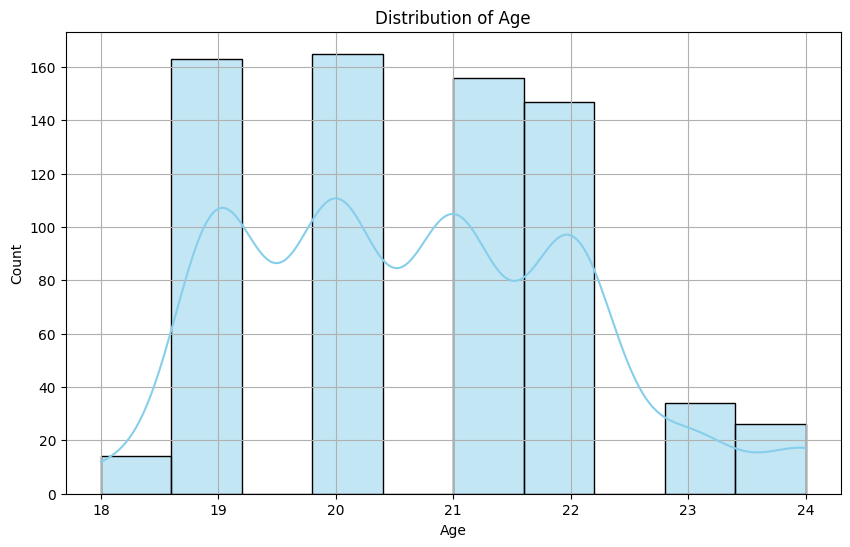


--- Exact Counts for Age ---
Value 18: 14
Value 19: 163
Value 20: 165
Value 21: 156
Value 22: 147
Value 23: 34
Value 24: 26
------------------------------------



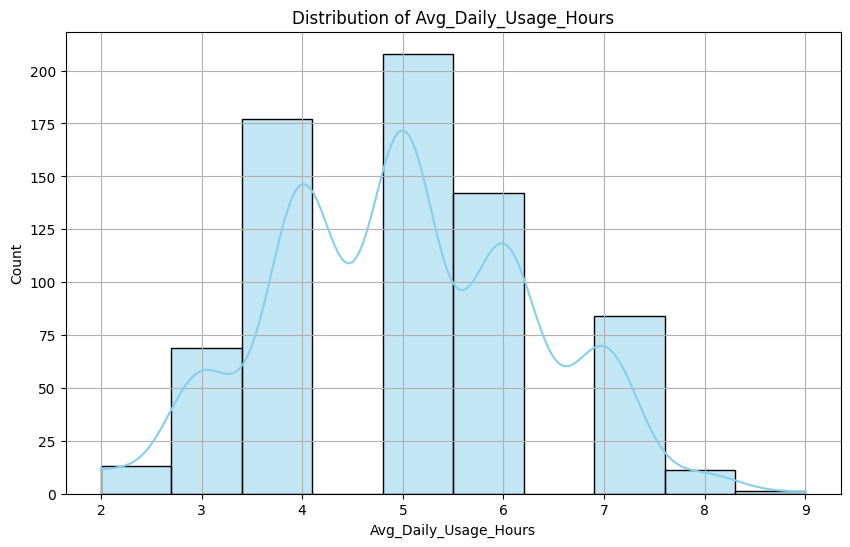


--- Exact Counts for Avg_Daily_Usage_Hours ---
Value 2: 13
Value 3: 69
Value 4: 177
Value 5: 208
Value 6: 142
Value 7: 84
Value 8: 11
Value 9: 1
------------------------------------



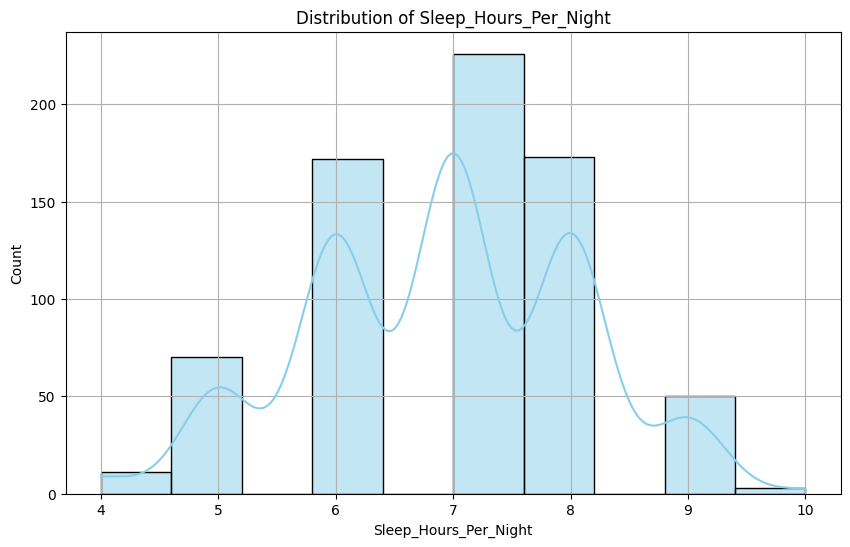


--- Exact Counts for Sleep_Hours_Per_Night ---
Value 4: 11
Value 5: 70
Value 6: 172
Value 7: 226
Value 8: 173
Value 9: 50
Value 10: 3
------------------------------------



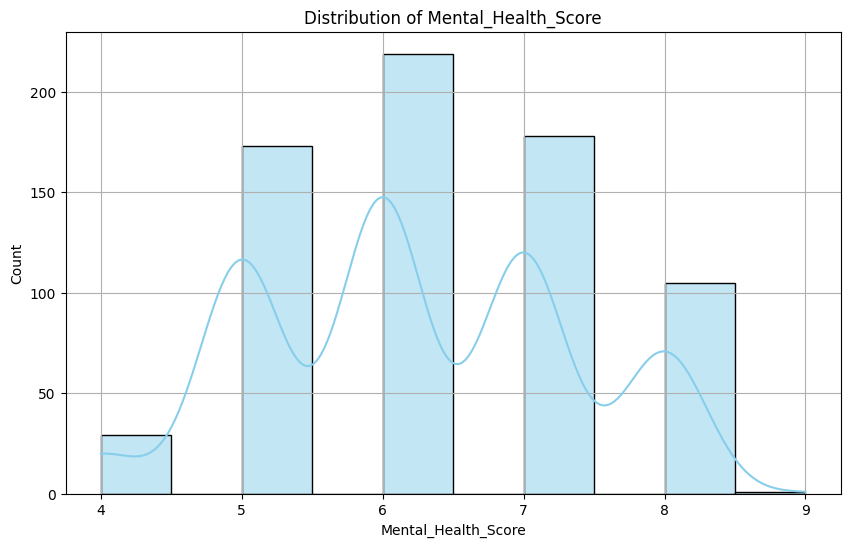


--- Exact Counts for Mental_Health_Score ---
Value 4: 29
Value 5: 173
Value 6: 219
Value 7: 178
Value 8: 105
Value 9: 1
------------------------------------



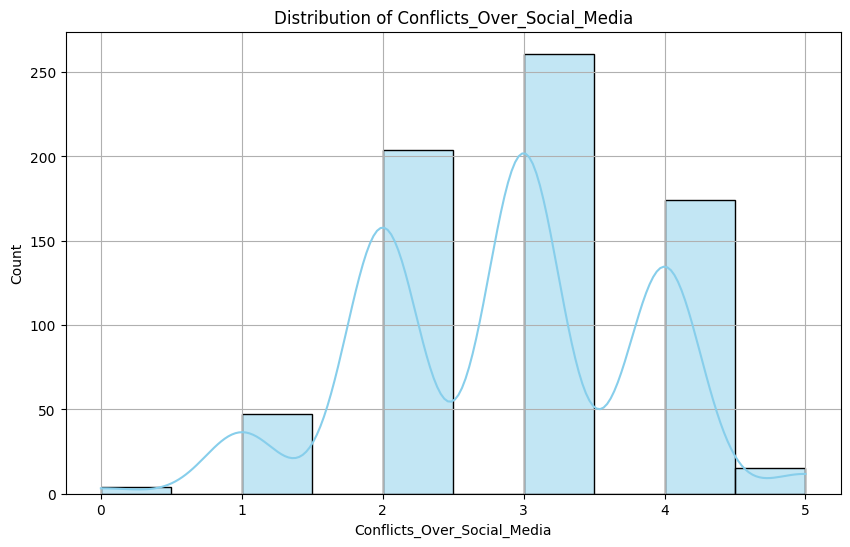


--- Exact Counts for Conflicts_Over_Social_Media ---
Value 0: 4
Value 1: 47
Value 2: 204
Value 3: 261
Value 4: 174
Value 5: 15
------------------------------------



In [26]:
# Histogram Showing the distribution of numerical values
for col in df_copy[numerical_cols] :
    plot_histogram_with_kde_and_counts(df_copy, col)

In [31]:
def plot_bar_with_summary(df, column_name):
    # Count occurrences of each unique value
    counts = df[column_name].value_counts().sort_index()

    # Plot the barplot
    plt.figure(figsize=(8, 5))
    sns.barplot(x=counts.index, y=counts.values, palette="pastel")
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

/tmp/ipython-input-28-793745458.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="pastel")


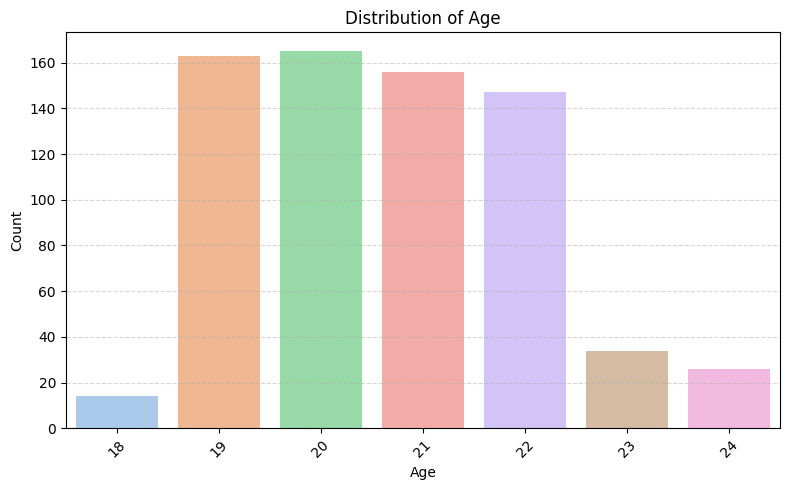

Summary for 'Age':
→ 14 entries with Age = 18
→ 163 entries with Age = 19
→ 165 entries with Age = 20
→ 156 entries with Age = 21
→ 147 entries with Age = 22
→ 34 entries with Age = 23
→ 26 entries with Age = 24
----------------------------------------


/tmp/ipython-input-28-793745458.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="pastel")


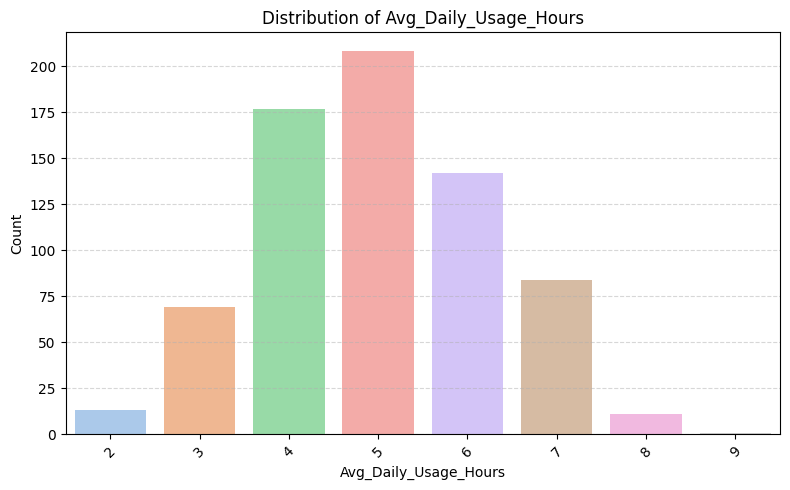

Summary for 'Avg_Daily_Usage_Hours':
→ 13 entries with Avg_Daily_Usage_Hours = 2
→ 69 entries with Avg_Daily_Usage_Hours = 3
→ 177 entries with Avg_Daily_Usage_Hours = 4
→ 208 entries with Avg_Daily_Usage_Hours = 5
→ 142 entries with Avg_Daily_Usage_Hours = 6
→ 84 entries with Avg_Daily_Usage_Hours = 7
→ 11 entries with Avg_Daily_Usage_Hours = 8
→ 1 entries with Avg_Daily_Usage_Hours = 9
----------------------------------------


/tmp/ipython-input-28-793745458.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="pastel")


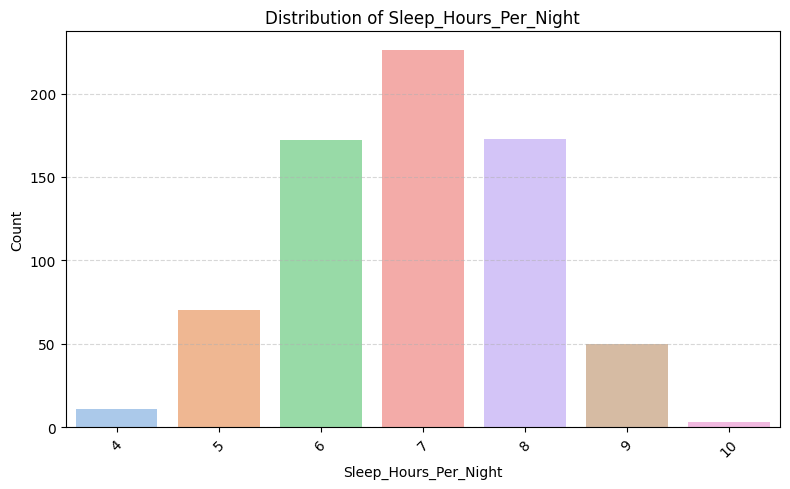

Summary for 'Sleep_Hours_Per_Night':
→ 11 entries with Sleep_Hours_Per_Night = 4
→ 70 entries with Sleep_Hours_Per_Night = 5
→ 172 entries with Sleep_Hours_Per_Night = 6
→ 226 entries with Sleep_Hours_Per_Night = 7
→ 173 entries with Sleep_Hours_Per_Night = 8
→ 50 entries with Sleep_Hours_Per_Night = 9
→ 3 entries with Sleep_Hours_Per_Night = 10
----------------------------------------


/tmp/ipython-input-28-793745458.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="pastel")


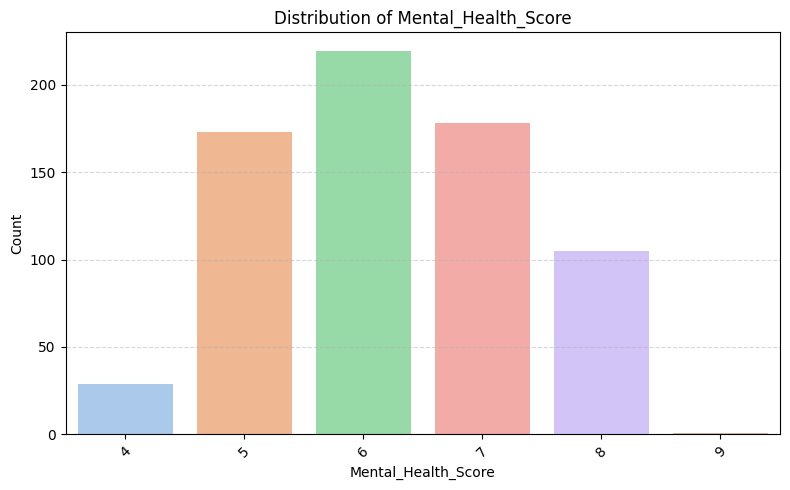

Summary for 'Mental_Health_Score':
→ 29 entries with Mental_Health_Score = 4
→ 173 entries with Mental_Health_Score = 5
→ 219 entries with Mental_Health_Score = 6
→ 178 entries with Mental_Health_Score = 7
→ 105 entries with Mental_Health_Score = 8
→ 1 entries with Mental_Health_Score = 9
----------------------------------------


/tmp/ipython-input-28-793745458.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="pastel")


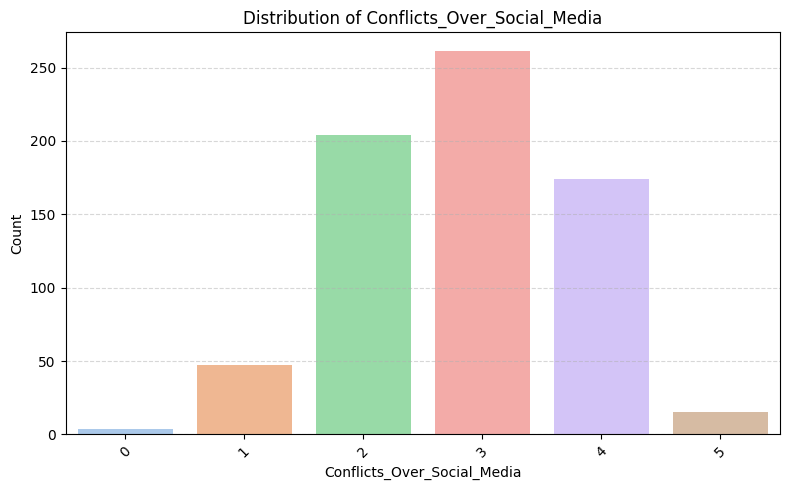

Summary for 'Conflicts_Over_Social_Media':
→ 4 entries with Conflicts_Over_Social_Media = 0
→ 47 entries with Conflicts_Over_Social_Media = 1
→ 204 entries with Conflicts_Over_Social_Media = 2
→ 261 entries with Conflicts_Over_Social_Media = 3
→ 174 entries with Conflicts_Over_Social_Media = 4
→ 15 entries with Conflicts_Over_Social_Media = 5
----------------------------------------


In [30]:
# Barchart summary
for cols in df_copy[numerical_cols] :
    plot_bar_with_summary(df_copy, cols)

In [32]:
def plot_boxplot(df, y_col):
    plt.figure(figsize=(6, 5))
    sns.boxplot(y=df[y_col], color='skyblue')
    plt.title(f'Boxplot of {y_col}')
    plt.ylabel(y_col)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

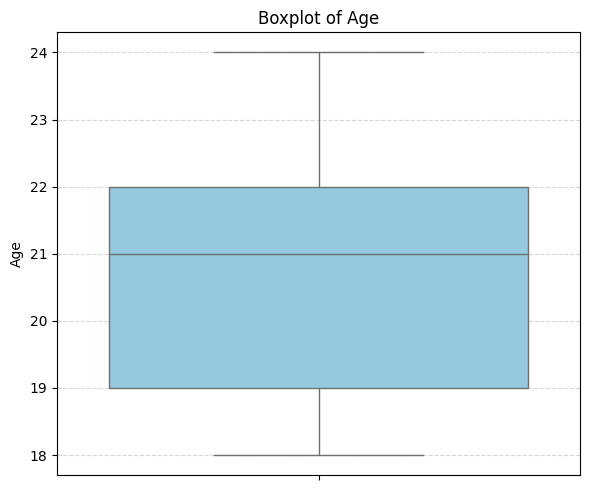

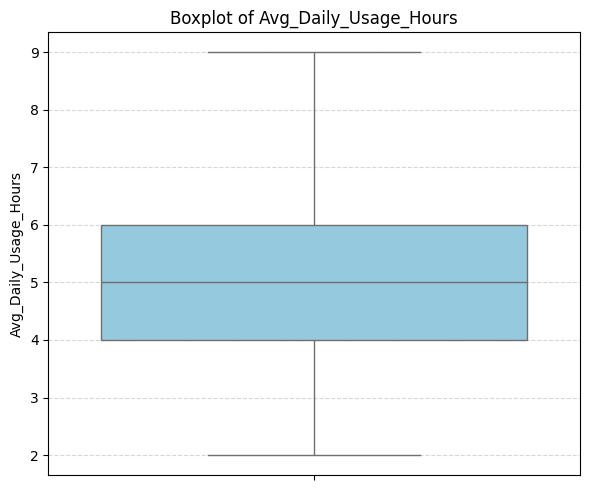

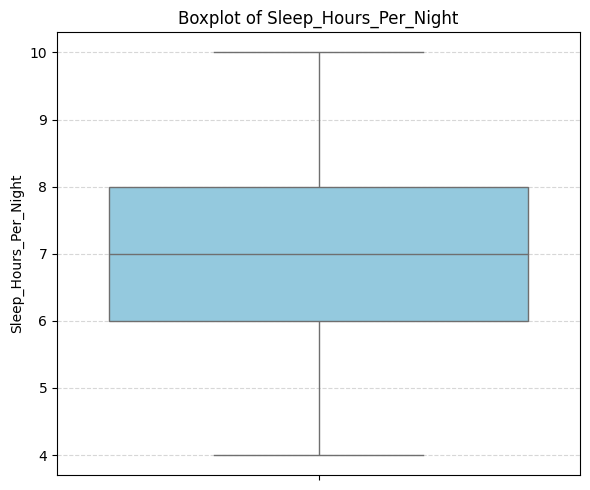

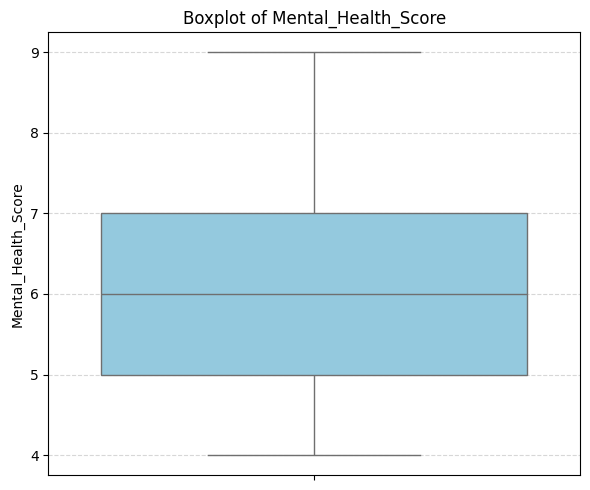

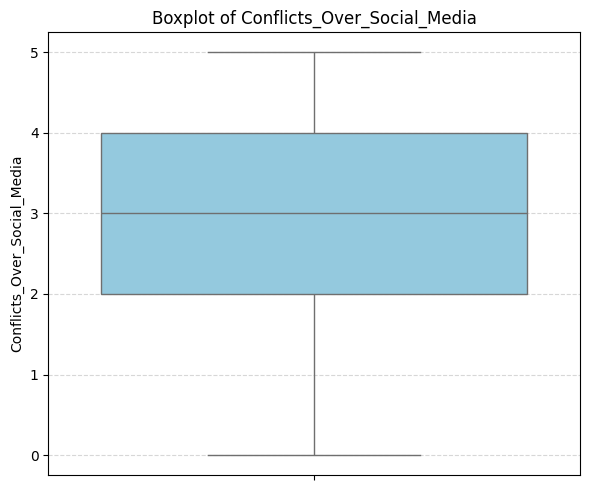

In [33]:
# Box Plot of Numerical Columns
for cols in df_copy[numerical_cols] :
    plot_boxplot(df_copy, cols)

## Bivariate/Multivariate Analysis

### Country column

In [39]:
# Getting Top Countries, grouping them together and then grouping the remaining country as other
# Top 10 most frequent countries
top_countries = df_copy['Country'].value_counts().nlargest(10).index.tolist()

# Replacing Country column with grouped countries
df_copy['Country'] = df_copy['Country'].apply(lambda x: x if x in top_countries else 'Other')

In [41]:
# Checking unique items in country to verify logic
df_copy["Country"].nunique()

11

/tmp/ipython-input-31-1958225483.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="pastel")


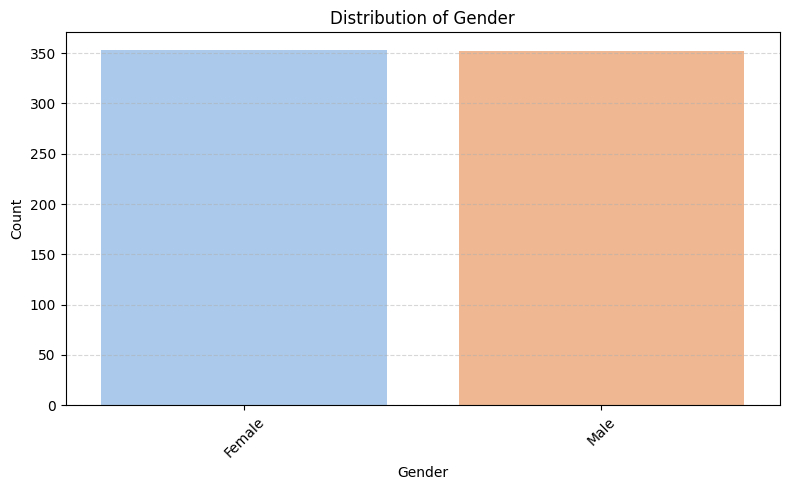

/tmp/ipython-input-31-1958225483.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="pastel")


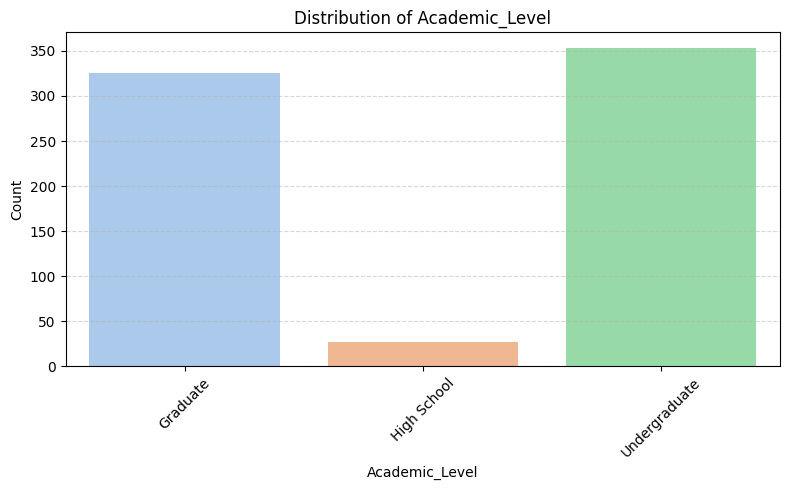

/tmp/ipython-input-31-1958225483.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="pastel")


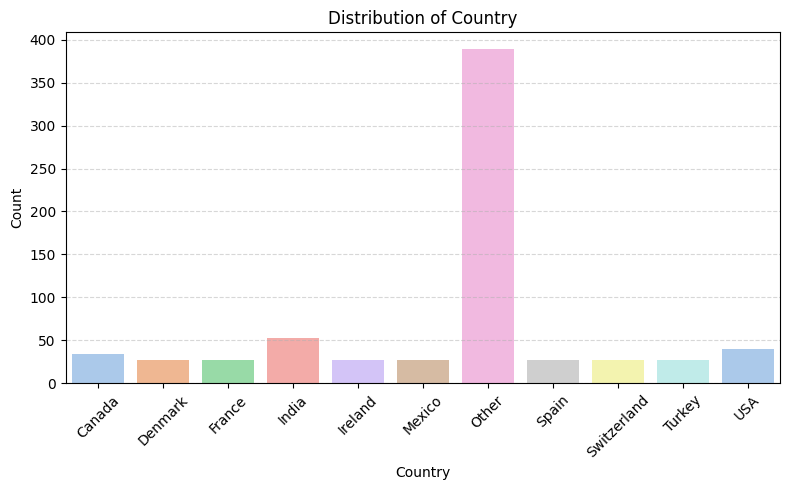

/tmp/ipython-input-31-1958225483.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="pastel")


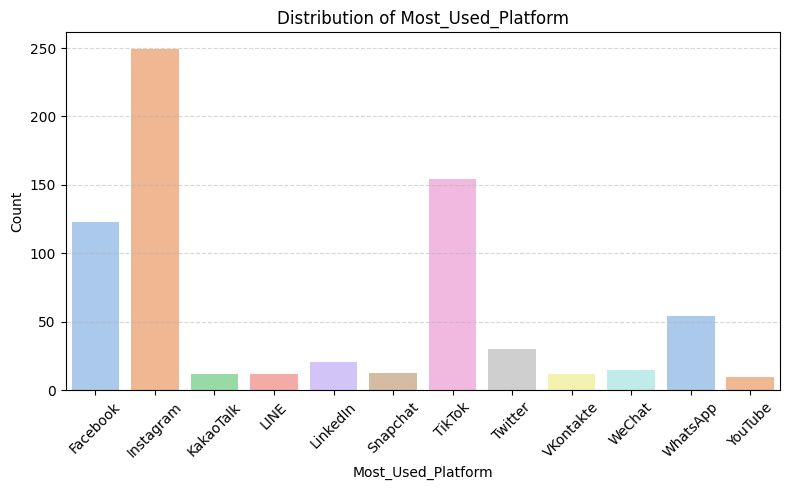

/tmp/ipython-input-31-1958225483.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="pastel")


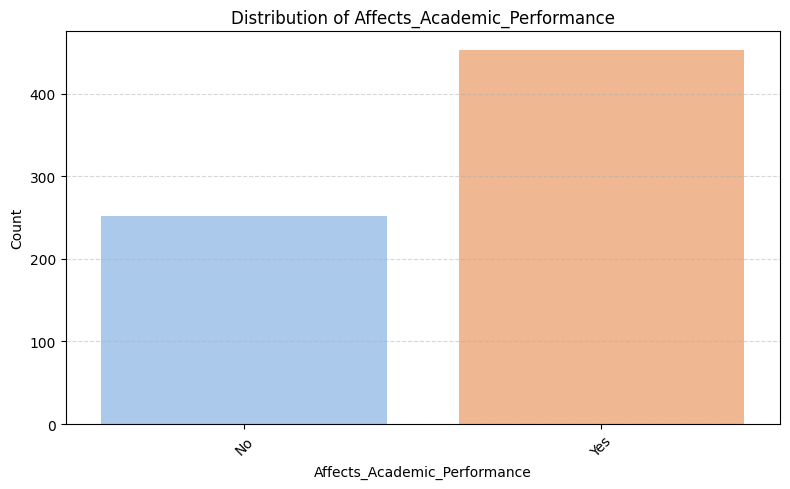

/tmp/ipython-input-31-1958225483.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="pastel")


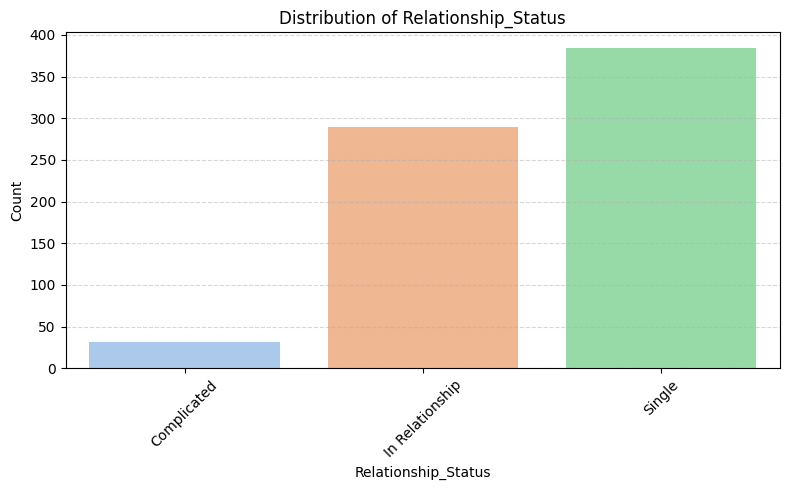

In [43]:
for cols in df_copy[categorical_cols] :
    plot_bar_with_summary(df_copy, cols)

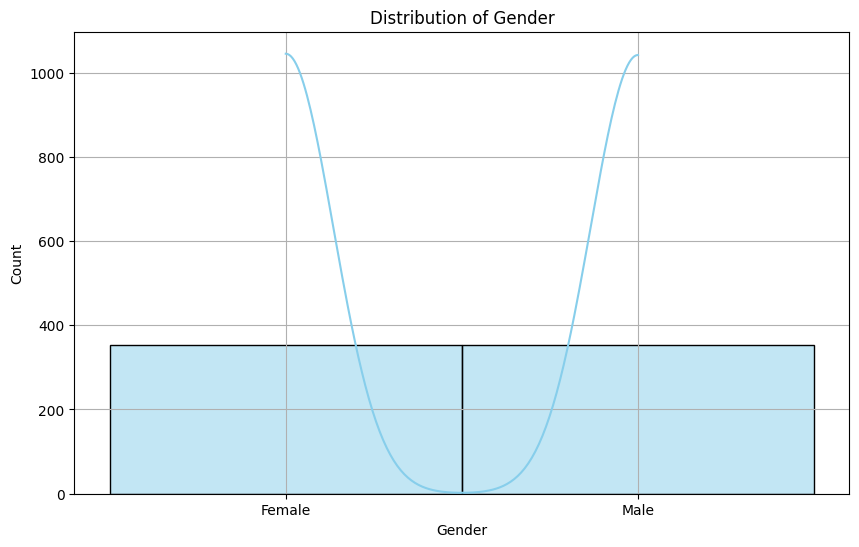


--- Exact Counts for Gender ---
Value Female: 353
Value Male: 352
------------------------------------



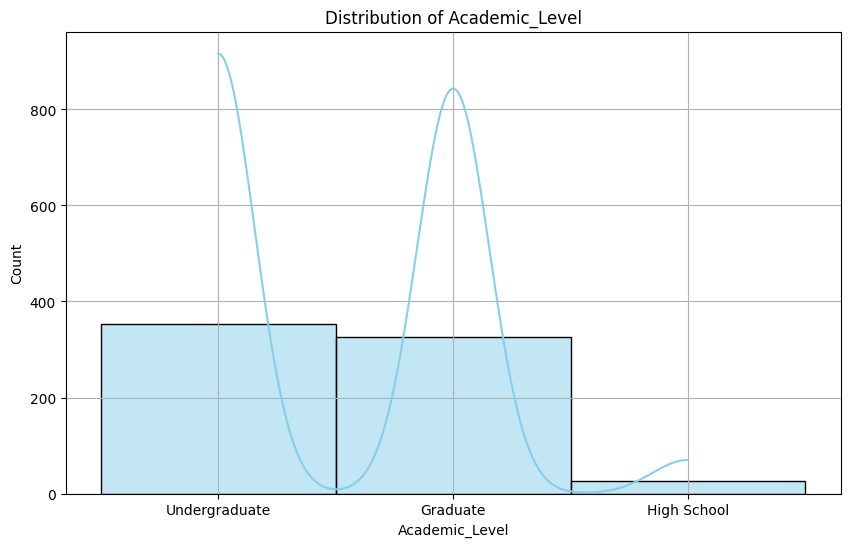


--- Exact Counts for Academic_Level ---
Value Graduate: 325
Value High School: 27
Value Undergraduate: 353
------------------------------------



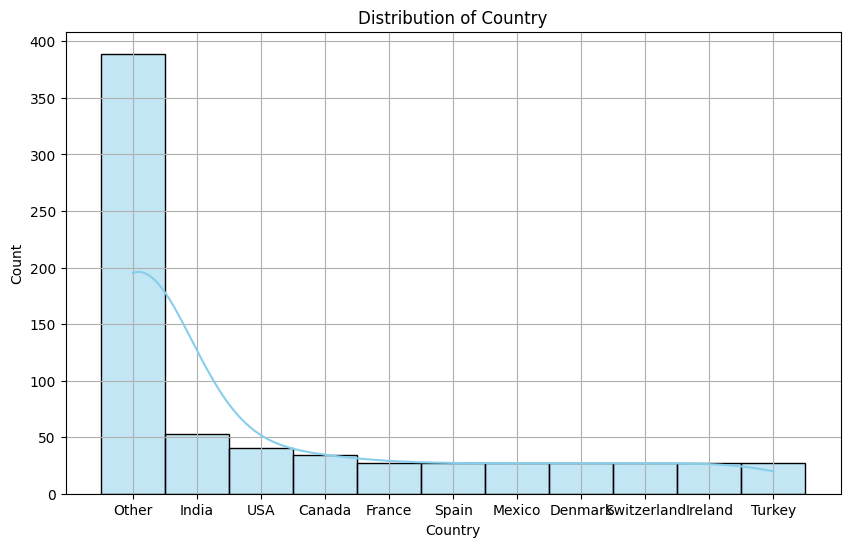


--- Exact Counts for Country ---
Value Canada: 34
Value Denmark: 27
Value France: 27
Value India: 53
Value Ireland: 27
Value Mexico: 27
Value Other: 389
Value Spain: 27
Value Switzerland: 27
Value Turkey: 27
Value USA: 40
------------------------------------



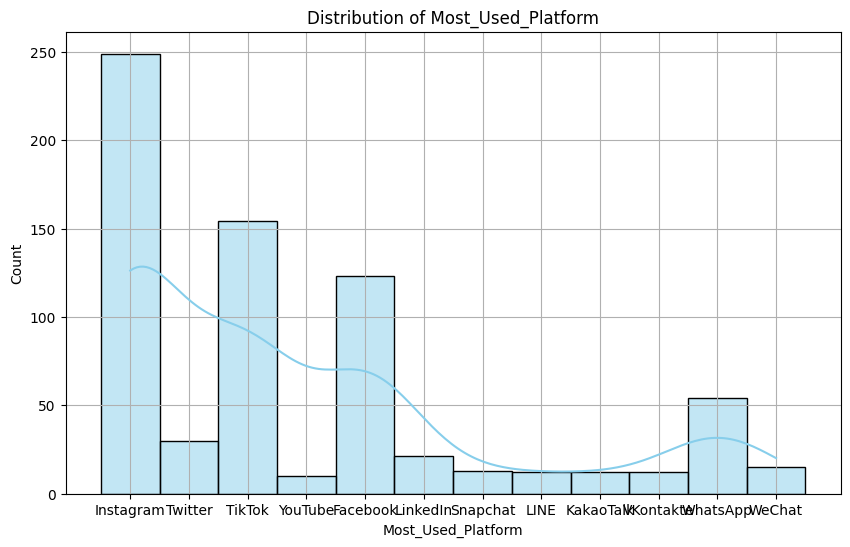


--- Exact Counts for Most_Used_Platform ---
Value Facebook: 123
Value Instagram: 249
Value KakaoTalk: 12
Value LINE: 12
Value LinkedIn: 21
Value Snapchat: 13
Value TikTok: 154
Value Twitter: 30
Value VKontakte: 12
Value WeChat: 15
Value WhatsApp: 54
Value YouTube: 10
------------------------------------



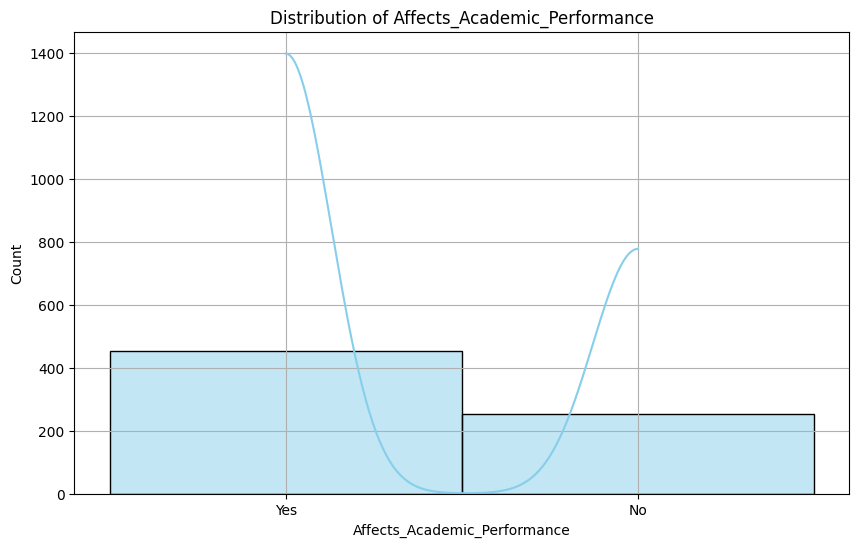


--- Exact Counts for Affects_Academic_Performance ---
Value No: 252
Value Yes: 453
------------------------------------



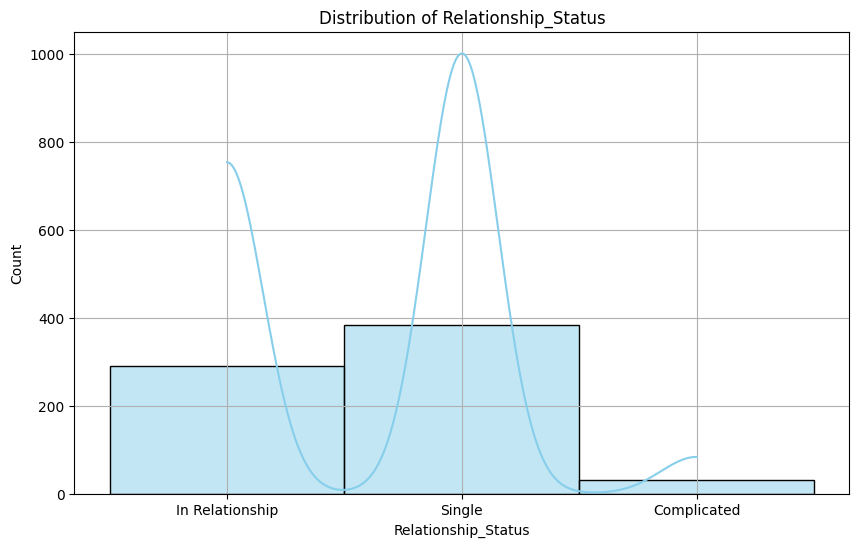


--- Exact Counts for Relationship_Status ---
Value Complicated: 32
Value In Relationship: 289
Value Single: 384
------------------------------------



In [46]:
for cols in df_copy[categorical_cols] :
    plot_histogram_with_kde_and_counts(df_copy, cols)

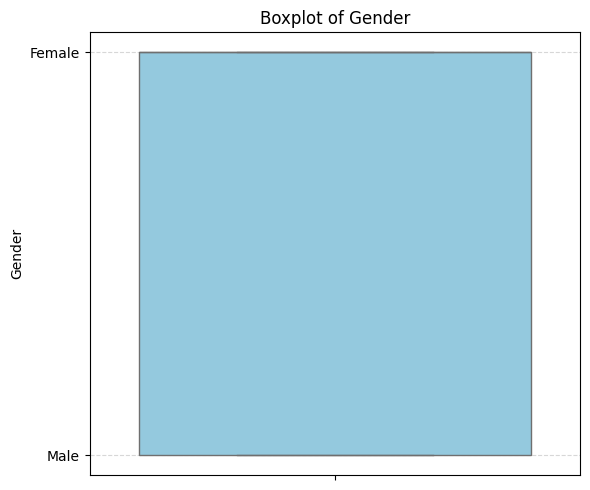

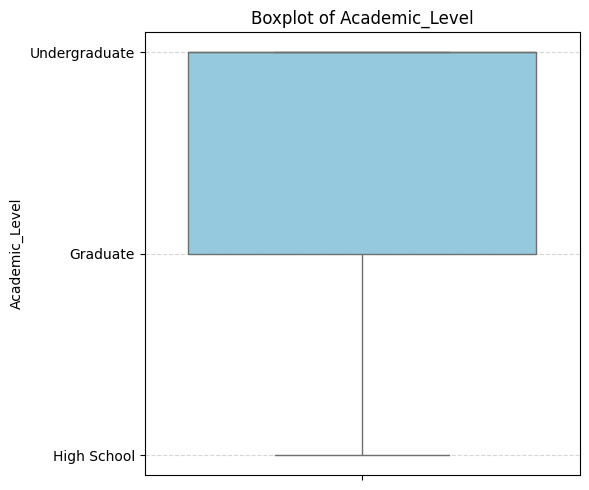

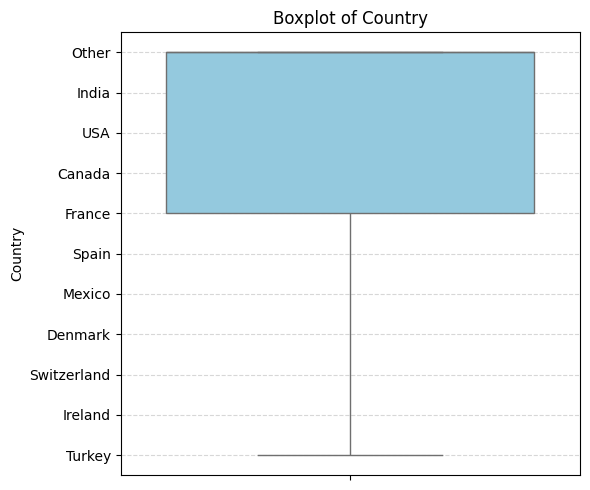

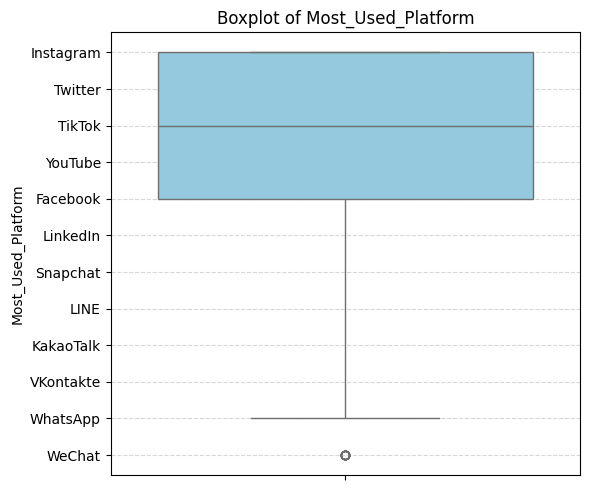

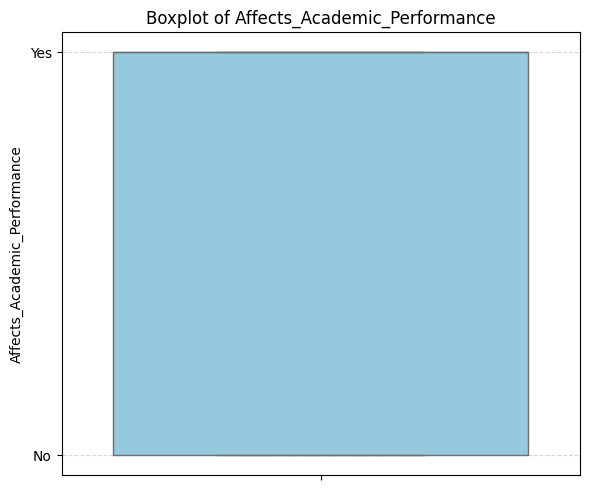

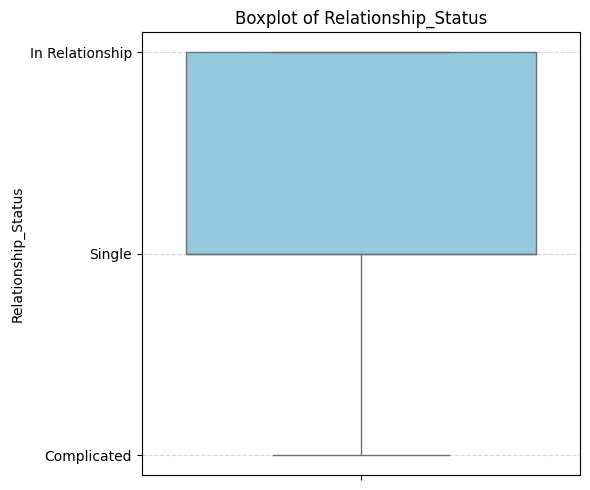

In [47]:
# Box plot of categorical columns
for cols in df_copy[categorical_cols] :
    plot_boxplot(df_copy, cols)

## Numerical Vs Numerical Columns

In [49]:
def compare_two_columns(df, col1, col2):
    plt.figure(figsize=(8, 6))
    # Scatter + regression line
    sns.regplot(data=df, x=col1, y=col2, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
    plt.title(f'{col2} vs {col1}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Correlation summary
    correlation = df[col1].corr(df[col2])
    print(f"📊 Correlation between '{col1}' and '{col2}': {correlation:.2f}")
    print("→ Positive correlation" if correlation > 0 else "→ Negative correlation" if correlation < 0 else "→ No correlation")
    print("-" * 50)

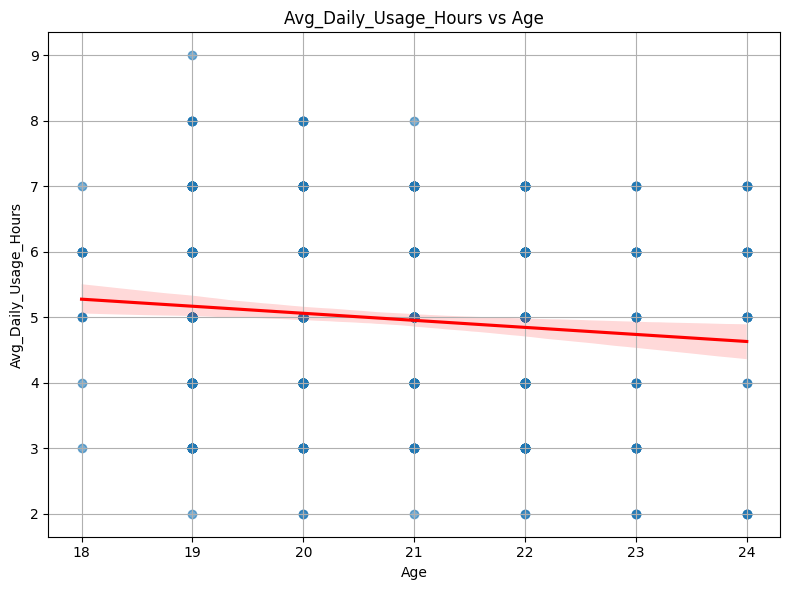

📊 Correlation between 'Age' and 'Avg_Daily_Usage_Hours': -0.12
→ Negative correlation
--------------------------------------------------


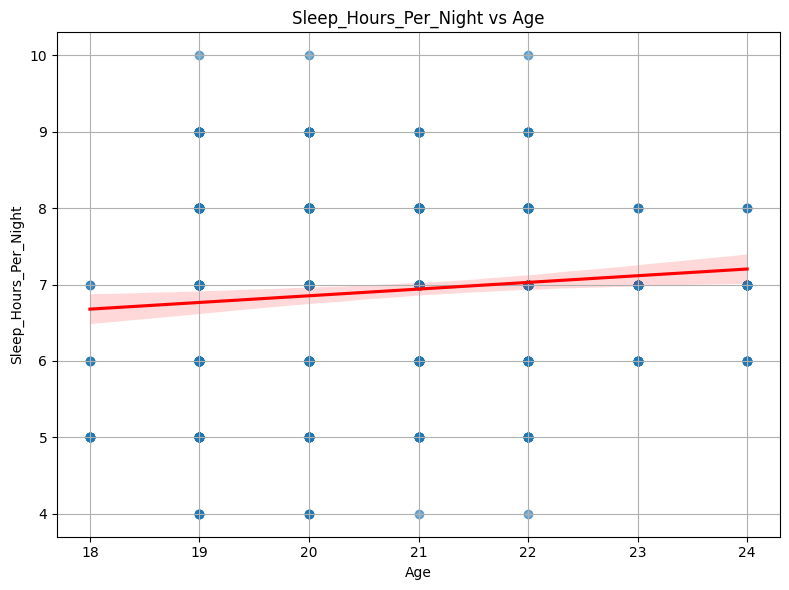

📊 Correlation between 'Age' and 'Sleep_Hours_Per_Night': 0.11
→ Positive correlation
--------------------------------------------------


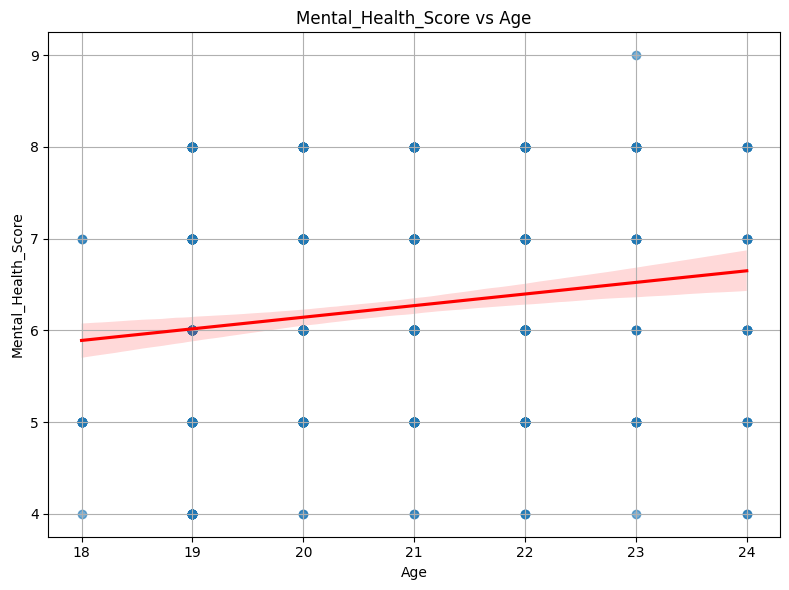

📊 Correlation between 'Age' and 'Mental_Health_Score': 0.16
→ Positive correlation
--------------------------------------------------


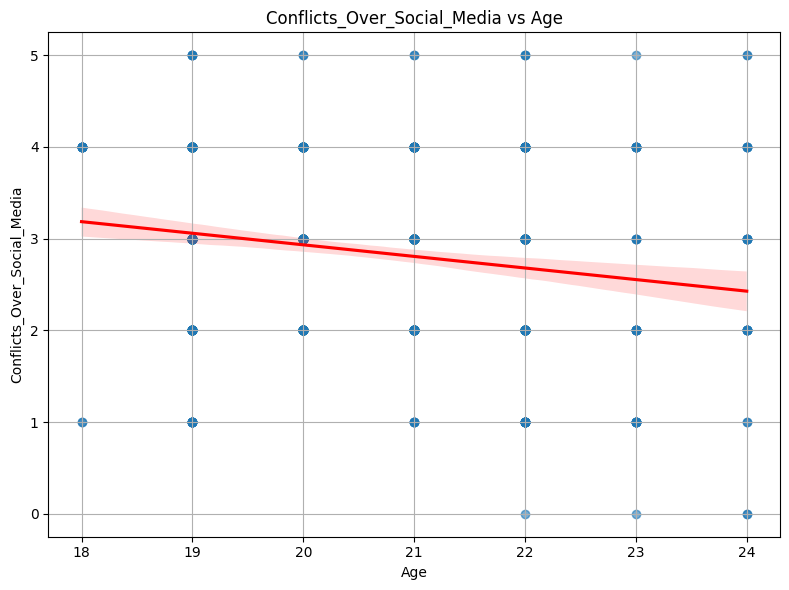

📊 Correlation between 'Age' and 'Conflicts_Over_Social_Media': -0.18
→ Negative correlation
--------------------------------------------------


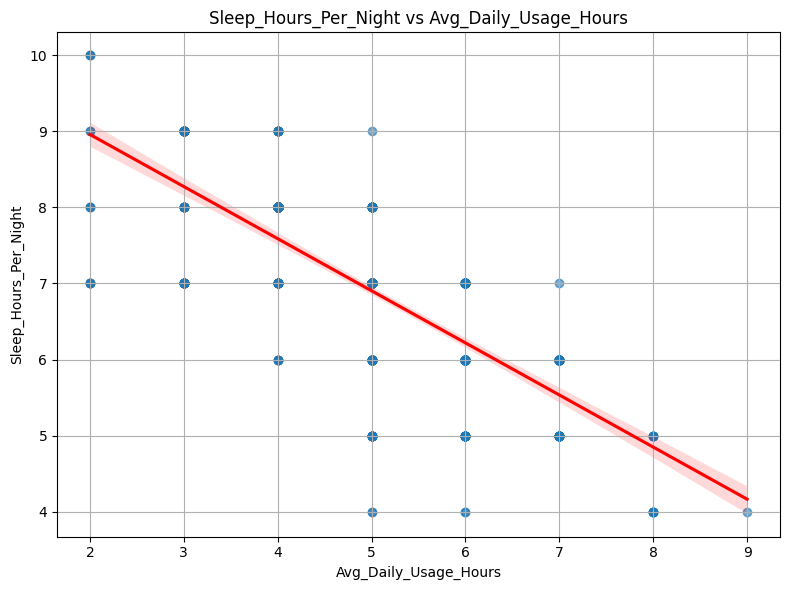

📊 Correlation between 'Avg_Daily_Usage_Hours' and 'Sleep_Hours_Per_Night': -0.76
→ Negative correlation
--------------------------------------------------


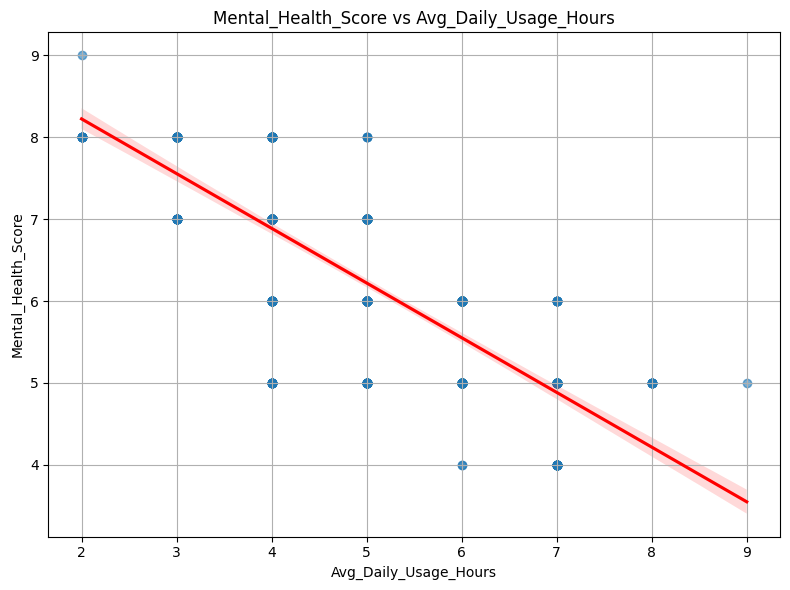

📊 Correlation between 'Avg_Daily_Usage_Hours' and 'Mental_Health_Score': -0.78
→ Negative correlation
--------------------------------------------------


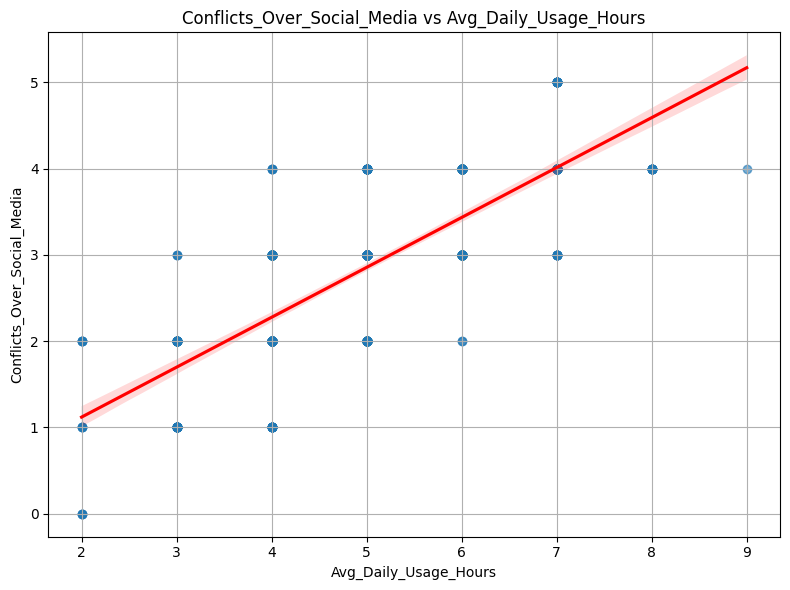

📊 Correlation between 'Avg_Daily_Usage_Hours' and 'Conflicts_Over_Social_Media': 0.78
→ Positive correlation
--------------------------------------------------


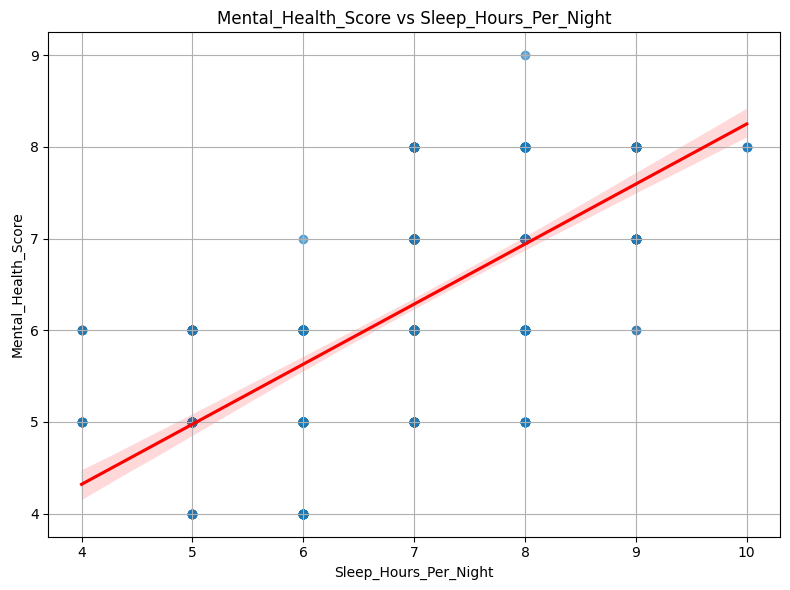

📊 Correlation between 'Sleep_Hours_Per_Night' and 'Mental_Health_Score': 0.69
→ Positive correlation
--------------------------------------------------


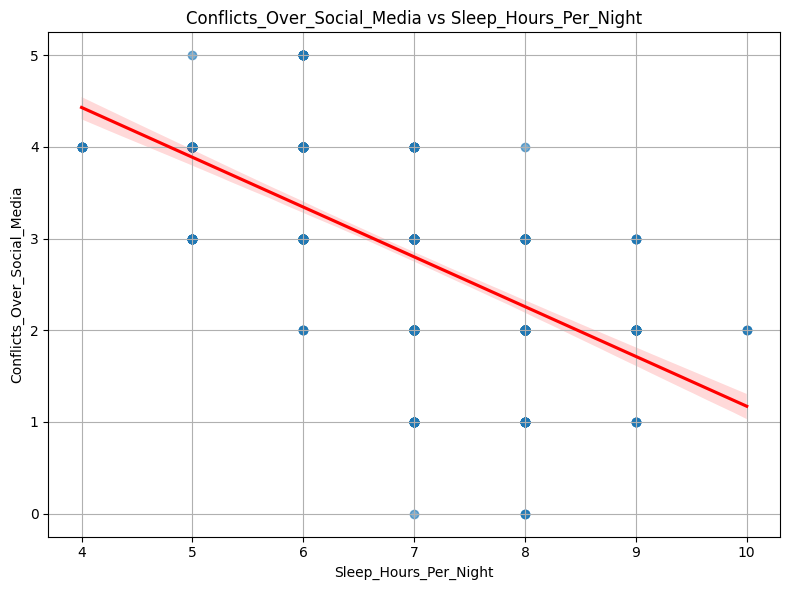

📊 Correlation between 'Sleep_Hours_Per_Night' and 'Conflicts_Over_Social_Media': -0.66
→ Negative correlation
--------------------------------------------------


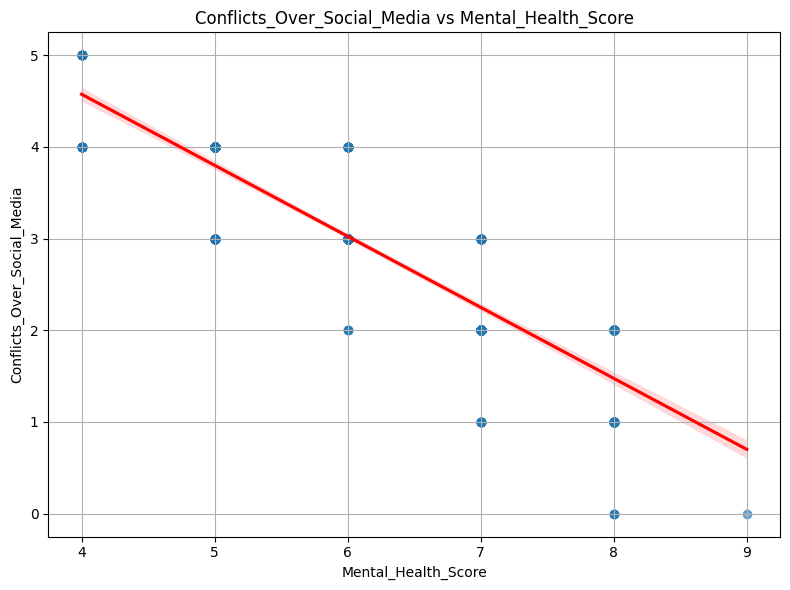

📊 Correlation between 'Mental_Health_Score' and 'Conflicts_Over_Social_Media': -0.89
→ Negative correlation
--------------------------------------------------


In [54]:
# Define list of numerical columns
columns_to_compare_numerical = df_copy[numerical_cols].columns.tolist()

# Loop through each unique pair of numerical columns
for i in range(len(columns_to_compare_numerical)):
    for j in range(i + 1, len(columns_to_compare_numerical)):
        col1 = columns_to_compare_numerical[i]
        col2 = columns_to_compare_numerical[j]
        compare_two_columns(df_copy[numerical_cols], col1, col2)

## Categorical Variable Vs Categorical Variable

In [57]:
# Function to compare two categorical columns
def compare_two_categorical_columns(df, col1, col2):
    plt.figure(figsize=(9, 5))
    sns.countplot(data=df, x=col1, hue=col2, palette="pastel")
    plt.title(f'{col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title=col2)
    plt.tight_layout()
    plt.show()

    # Crosstab summary
    print(f"📊 Crosstab for '{col1}' vs '{col2}':")
    print(pd.crosstab(df[col1], df[col2]))
    print("-" * 60)

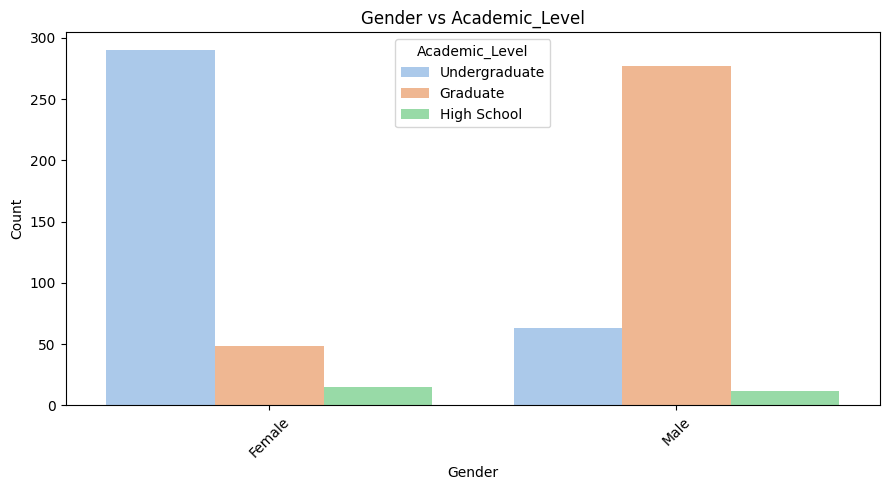

📊 Crosstab for 'Gender' vs 'Academic_Level':
Academic_Level  Graduate  High School  Undergraduate
Gender                                              
Female                48           15            290
Male                 277           12             63
------------------------------------------------------------


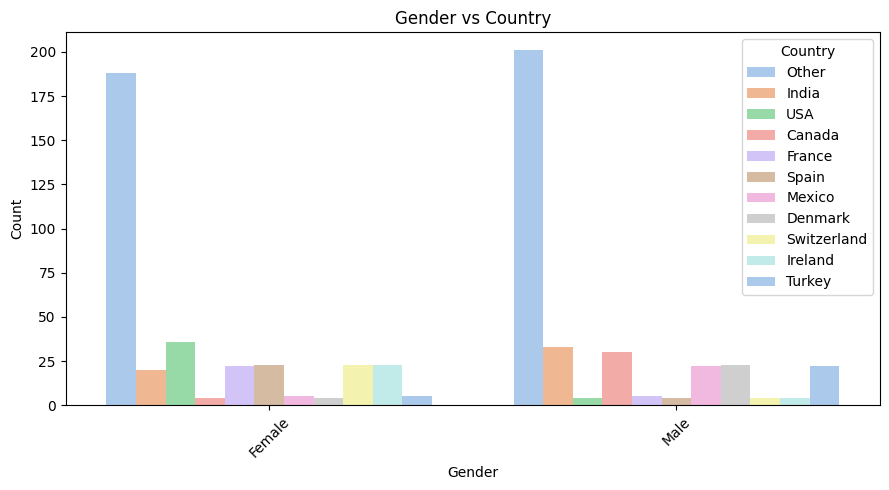

📊 Crosstab for 'Gender' vs 'Country':
Country  Canada  Denmark  France  India  Ireland  Mexico  Other  Spain  \
Gender                                                                   
Female        4        4      22     20       23       5    188     23   
Male         30       23       5     33        4      22    201      4   

Country  Switzerland  Turkey  USA  
Gender                             
Female            23       5   36  
Male               4      22    4  
------------------------------------------------------------


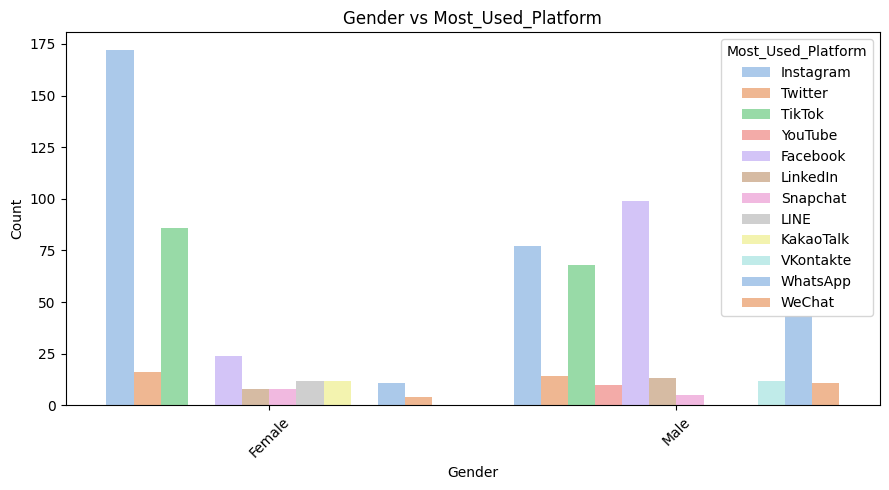

📊 Crosstab for 'Gender' vs 'Most_Used_Platform':
Most_Used_Platform  Facebook  Instagram  KakaoTalk  LINE  LinkedIn  Snapchat  \
Gender                                                                         
Female                    24        172         12    12         8         8   
Male                      99         77          0     0        13         5   

Most_Used_Platform  TikTok  Twitter  VKontakte  WeChat  WhatsApp  YouTube  
Gender                                                                     
Female                  86       16          0       4        11        0  
Male                    68       14         12      11        43       10  
------------------------------------------------------------


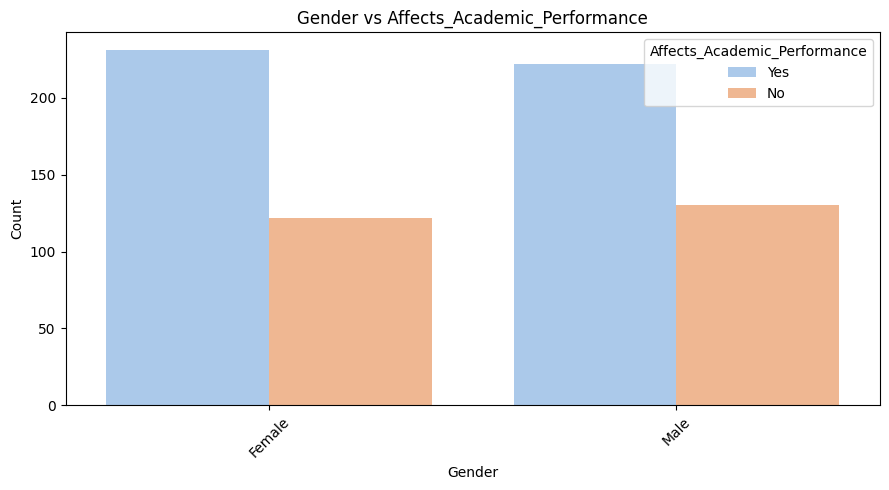

📊 Crosstab for 'Gender' vs 'Affects_Academic_Performance':
Affects_Academic_Performance   No  Yes
Gender                                
Female                        122  231
Male                          130  222
------------------------------------------------------------


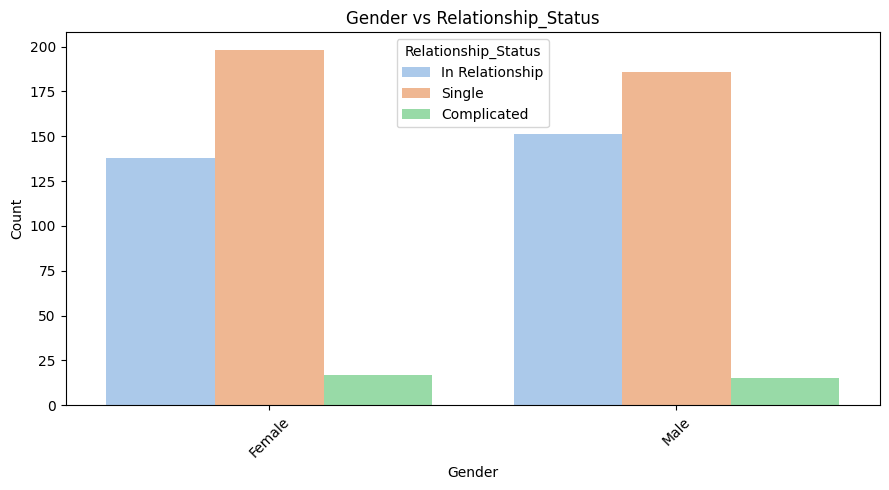

📊 Crosstab for 'Gender' vs 'Relationship_Status':
Relationship_Status  Complicated  In Relationship  Single
Gender                                                   
Female                        17              138     198
Male                          15              151     186
------------------------------------------------------------


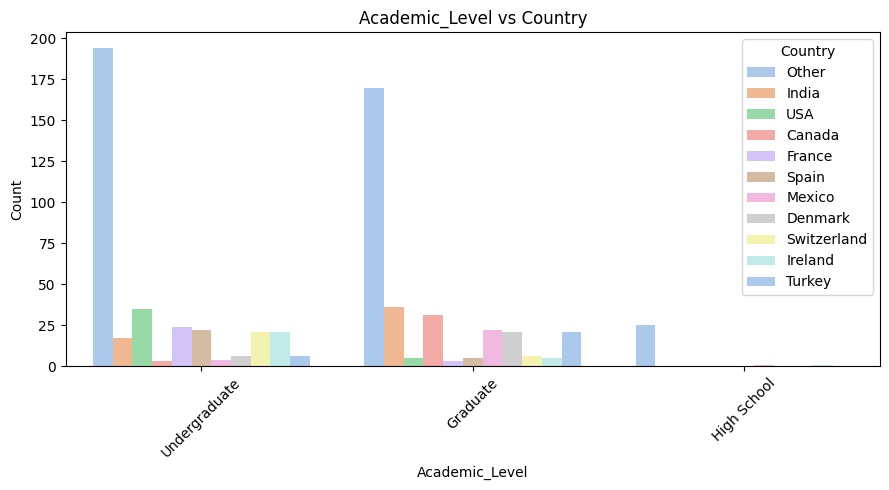

📊 Crosstab for 'Academic_Level' vs 'Country':
Country         Canada  Denmark  France  India  Ireland  Mexico  Other  Spain  \
Academic_Level                                                                  
Graduate            31       21       3     36        5      22    170      5   
High School          0        0       0      0        1       1     25      0   
Undergraduate        3        6      24     17       21       4    194     22   

Country         Switzerland  Turkey  USA  
Academic_Level                            
Graduate                  6      21    5  
High School               0       0    0  
Undergraduate            21       6   35  
------------------------------------------------------------


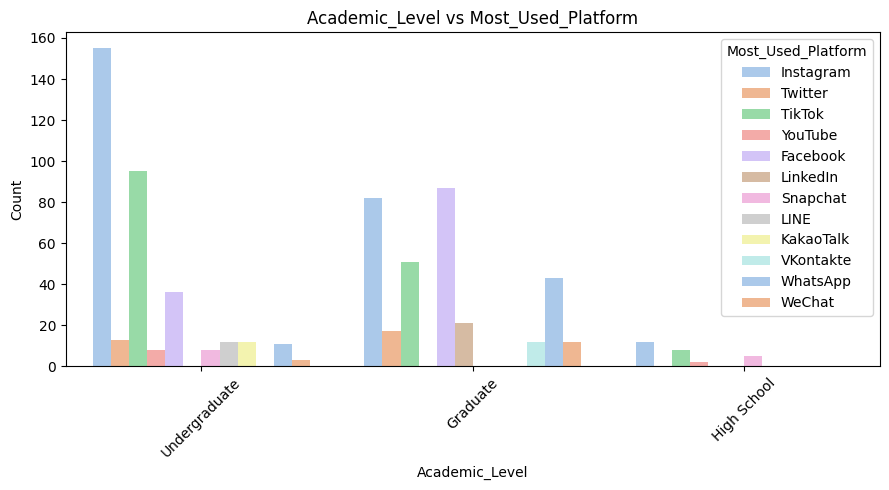

📊 Crosstab for 'Academic_Level' vs 'Most_Used_Platform':
Most_Used_Platform  Facebook  Instagram  KakaoTalk  LINE  LinkedIn  Snapchat  \
Academic_Level                                                                 
Graduate                  87         82          0     0        21         0   
High School                0         12          0     0         0         5   
Undergraduate             36        155         12    12         0         8   

Most_Used_Platform  TikTok  Twitter  VKontakte  WeChat  WhatsApp  YouTube  
Academic_Level                                                             
Graduate                51       17         12      12        43        0  
High School              8        0          0       0         0        2  
Undergraduate           95       13          0       3        11        8  
------------------------------------------------------------


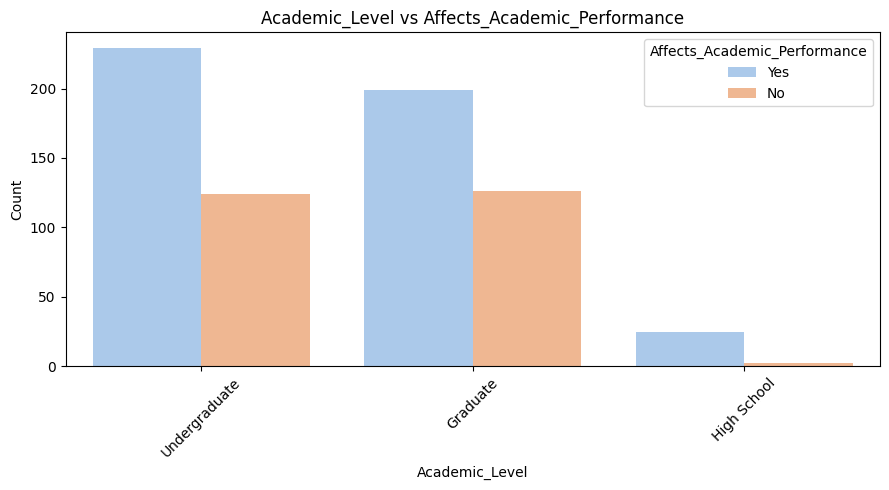

📊 Crosstab for 'Academic_Level' vs 'Affects_Academic_Performance':
Affects_Academic_Performance   No  Yes
Academic_Level                        
Graduate                      126  199
High School                     2   25
Undergraduate                 124  229
------------------------------------------------------------


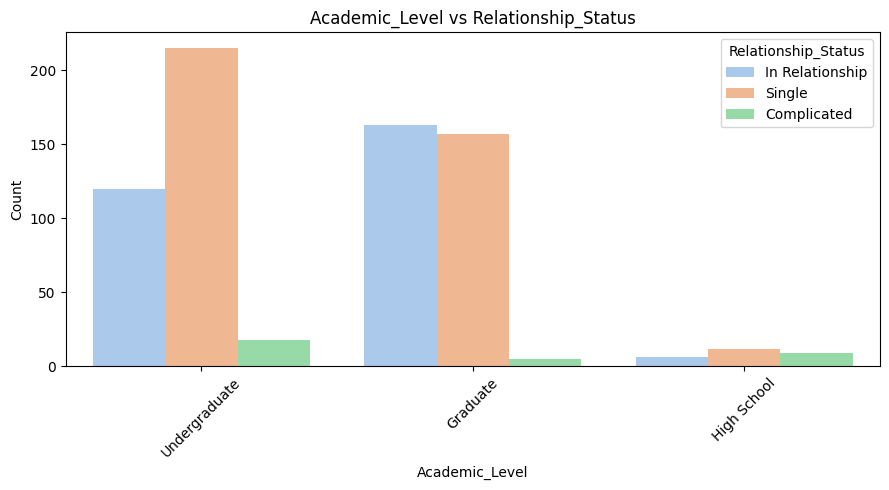

📊 Crosstab for 'Academic_Level' vs 'Relationship_Status':
Relationship_Status  Complicated  In Relationship  Single
Academic_Level                                           
Graduate                       5              163     157
High School                    9                6      12
Undergraduate                 18              120     215
------------------------------------------------------------


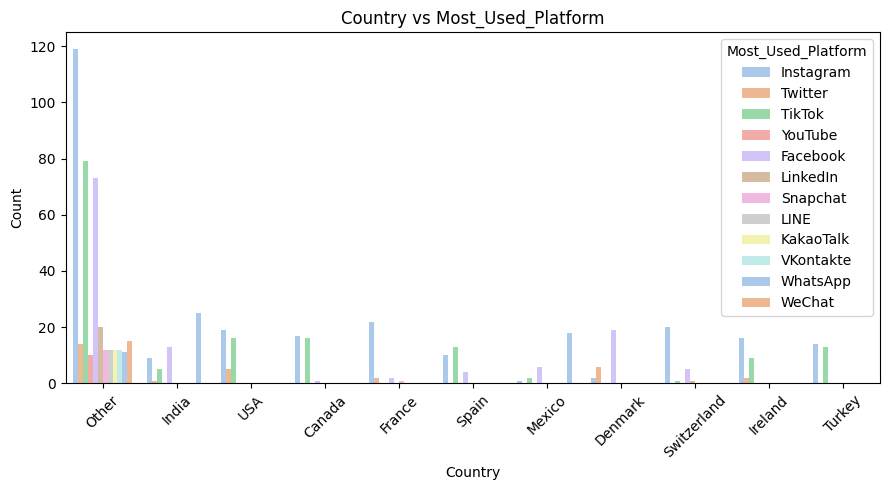

📊 Crosstab for 'Country' vs 'Most_Used_Platform':
Most_Used_Platform  Facebook  Instagram  KakaoTalk  LINE  LinkedIn  Snapchat  \
Country                                                                        
Canada                     1         17          0     0         0         0   
Denmark                   19          2          0     0         0         0   
France                     2         22          0     0         0         1   
India                     13          9          0     0         0         0   
Ireland                    0         16          0     0         0         0   
Mexico                     6          1          0     0         0         0   
Other                     73        119         12    12        20        12   
Spain                      4         10          0     0         0         0   
Switzerland                5         20          0     0         1         0   
Turkey                     0         14          0     0         0    

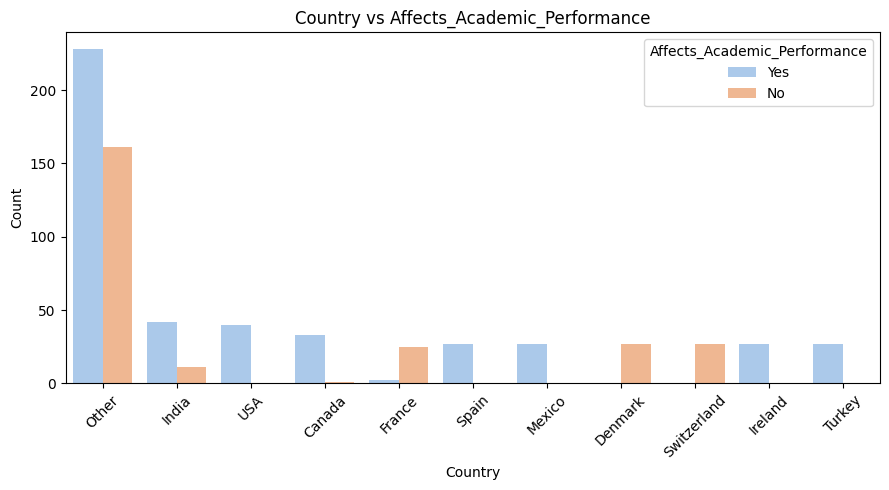

📊 Crosstab for 'Country' vs 'Affects_Academic_Performance':
Affects_Academic_Performance   No  Yes
Country                               
Canada                          1   33
Denmark                        27    0
France                         25    2
India                          11   42
Ireland                         0   27
Mexico                          0   27
Other                         161  228
Spain                           0   27
Switzerland                    27    0
Turkey                          0   27
USA                             0   40
------------------------------------------------------------


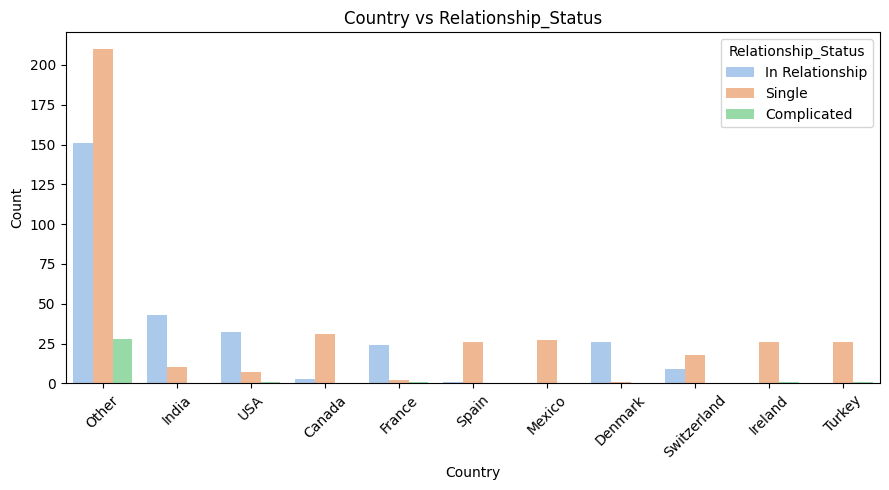

📊 Crosstab for 'Country' vs 'Relationship_Status':
Relationship_Status  Complicated  In Relationship  Single
Country                                                  
Canada                         0                3      31
Denmark                        0               26       1
France                         1               24       2
India                          0               43      10
Ireland                        1                0      26
Mexico                         0                0      27
Other                         28              151     210
Spain                          0                1      26
Switzerland                    0                9      18
Turkey                         1                0      26
USA                            1               32       7
------------------------------------------------------------


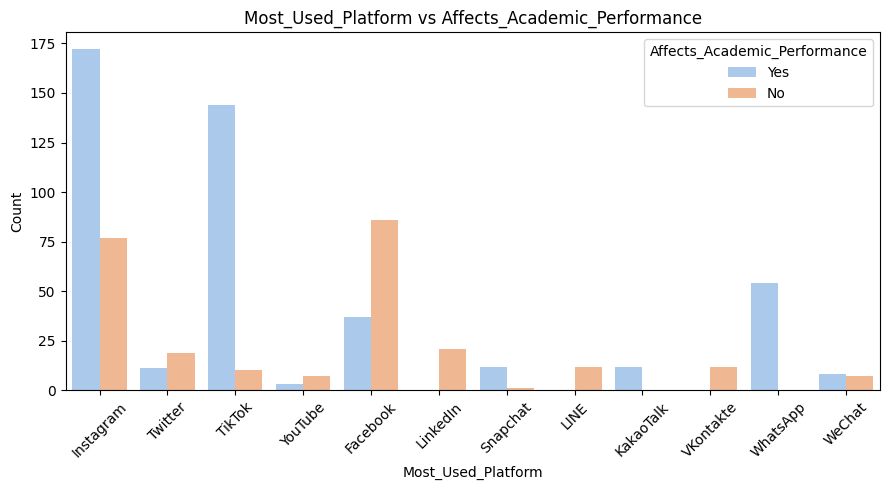

📊 Crosstab for 'Most_Used_Platform' vs 'Affects_Academic_Performance':
Affects_Academic_Performance  No  Yes
Most_Used_Platform                   
Facebook                      86   37
Instagram                     77  172
KakaoTalk                      0   12
LINE                          12    0
LinkedIn                      21    0
Snapchat                       1   12
TikTok                        10  144
Twitter                       19   11
VKontakte                     12    0
WeChat                         7    8
WhatsApp                       0   54
YouTube                        7    3
------------------------------------------------------------


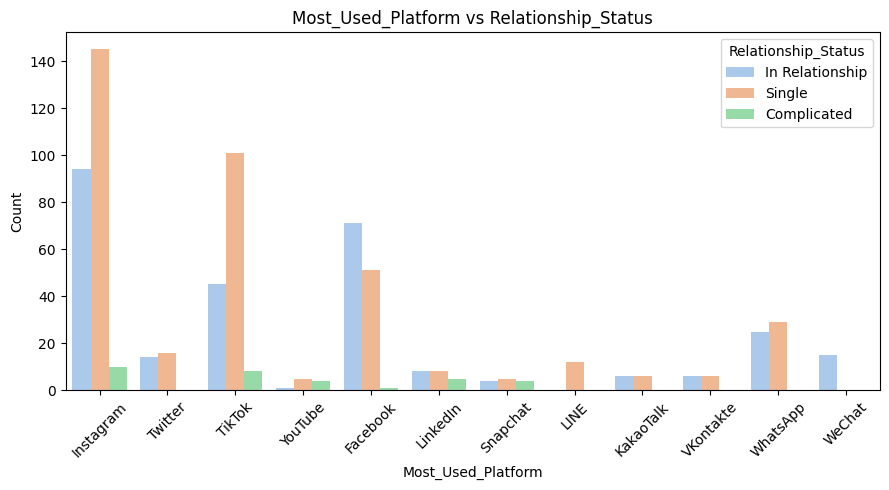

📊 Crosstab for 'Most_Used_Platform' vs 'Relationship_Status':
Relationship_Status  Complicated  In Relationship  Single
Most_Used_Platform                                       
Facebook                       1               71      51
Instagram                     10               94     145
KakaoTalk                      0                6       6
LINE                           0                0      12
LinkedIn                       5                8       8
Snapchat                       4                4       5
TikTok                         8               45     101
Twitter                        0               14      16
VKontakte                      0                6       6
WeChat                         0               15       0
WhatsApp                       0               25      29
YouTube                        4                1       5
------------------------------------------------------------


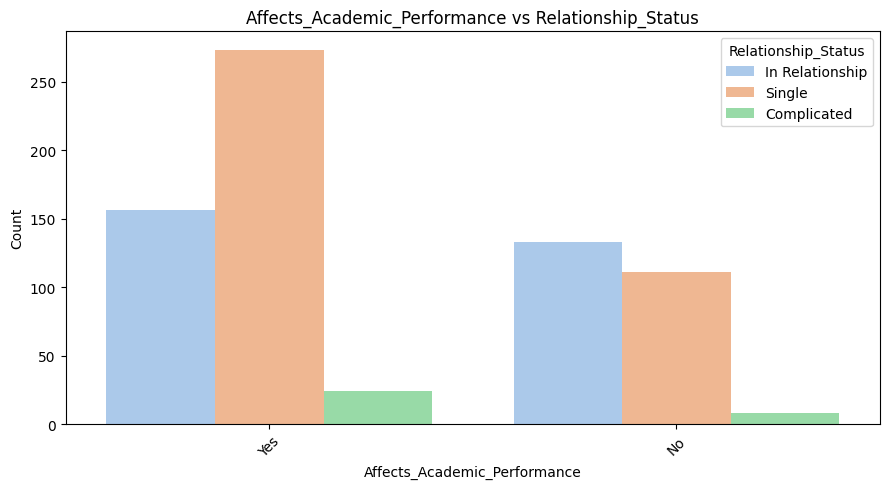

📊 Crosstab for 'Affects_Academic_Performance' vs 'Relationship_Status':
Relationship_Status           Complicated  In Relationship  Single
Affects_Academic_Performance                                      
No                                      8              133     111
Yes                                    24              156     273
------------------------------------------------------------


In [58]:
# Define list of categorical columns
columns_to_compare_categorical = df_copy[categorical_cols].columns.tolist()

# Loop through each unique pair of categorical columns
for i in range(len(columns_to_compare_categorical)):
    for j in range(i + 1, len(columns_to_compare_categorical)):
        col1 = columns_to_compare_categorical[i]
        col2 = columns_to_compare_categorical[j]
        compare_two_categorical_columns(df_copy[categorical_cols], col1, col2)


## Categorical Variables Vs Numerical Variables

In [60]:
def compare_cat_num(df, cat_col, num_col, n_clusters=3):
    print(f"🔍 Comparing '{num_col}' by '{cat_col}'")

    # Boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=cat_col, y=num_col, palette='pastel')
    plt.title(f'{num_col} distribution across {cat_col}')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Swarmplot (shows all points on top of boxplot)
    plt.figure(figsize=(8, 5))
    sns.swarmplot(data=df, x=cat_col, y=num_col, palette='Set2', alpha=0.7)
    plt.title(f'{num_col} values per {cat_col} (Swarm Plot)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # KMeans clustering on the numerical variable per category (1D + label)
    df_k = df[[num_col]].dropna()
    km = KMeans(n_clusters=n_clusters, random_state=42)
    df_k['Cluster'] = km.fit_predict(df_k[[num_col]])

    plt.figure(figsize=(7, 4))
    sns.histplot(data=df_k, x=num_col, hue='Cluster', palette='tab10', bins=15, kde=True)
    plt.title(f'KMeans Clustering on {num_col}')
    plt.tight_layout()
    plt.show()

    print("-" * 60)

🔍 Comparing 'Age' by 'Gender'


/tmp/ipython-input-60-2784742840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette='pastel')


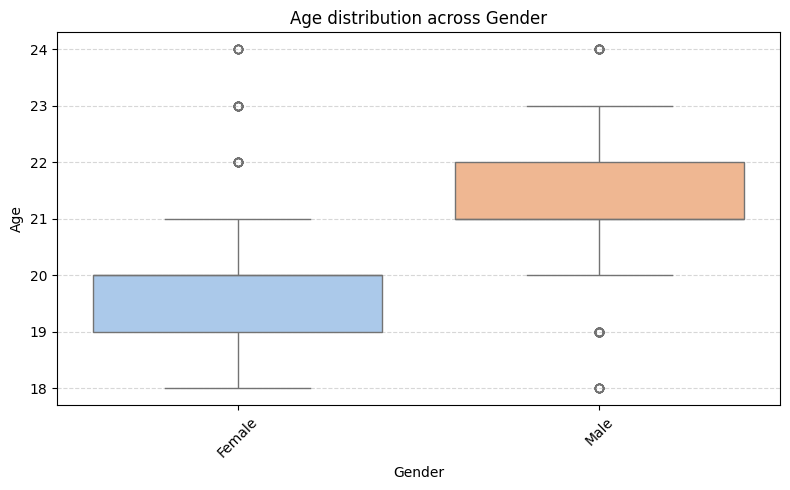

/tmp/ipython-input-60-2784742840.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x=cat_col, y=num_col, palette='Set2', alpha=0.7)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 38.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 57.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/

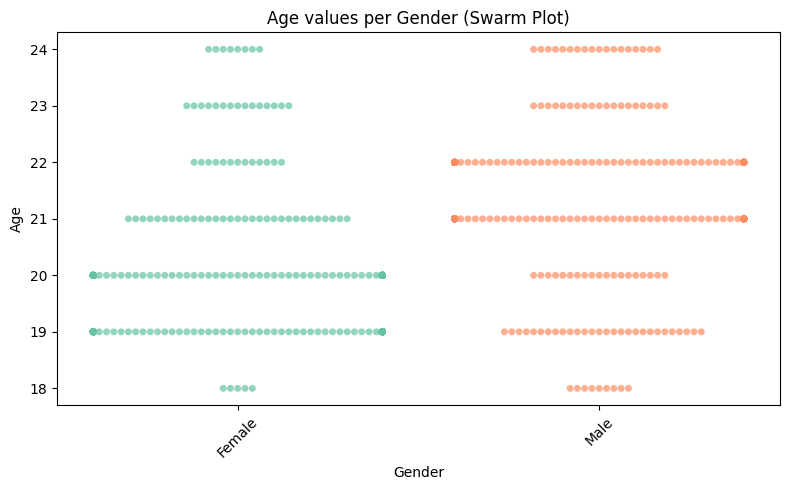

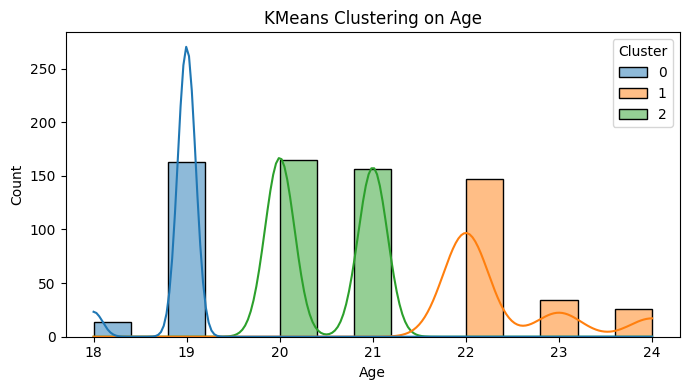

------------------------------------------------------------
🔍 Comparing 'Avg_Daily_Usage_Hours' by 'Gender'


/tmp/ipython-input-60-2784742840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette='pastel')


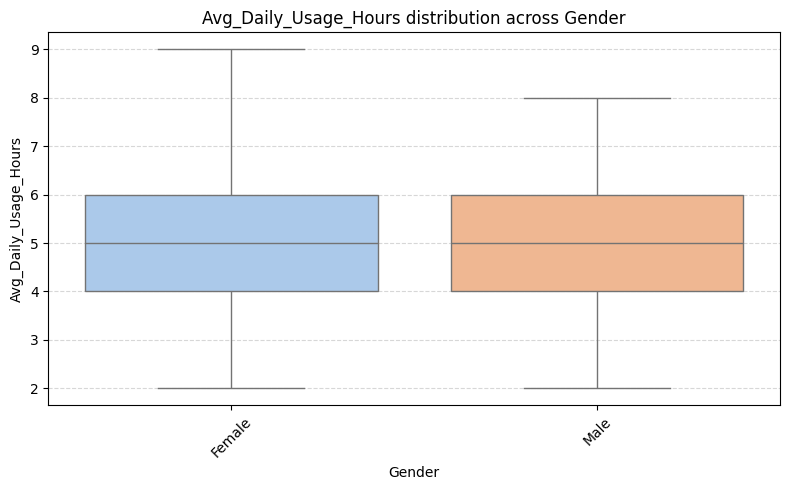

/tmp/ipython-input-60-2784742840.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x=cat_col, y=num_col, palette='Set2', alpha=0.7)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 18.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 27.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/

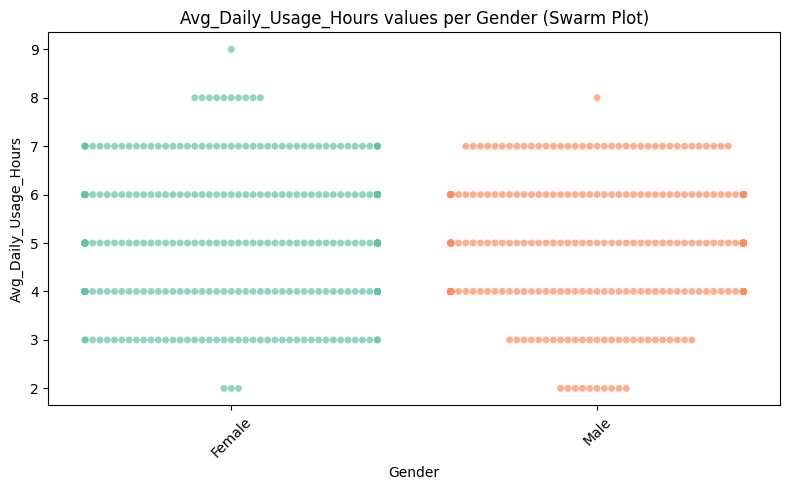

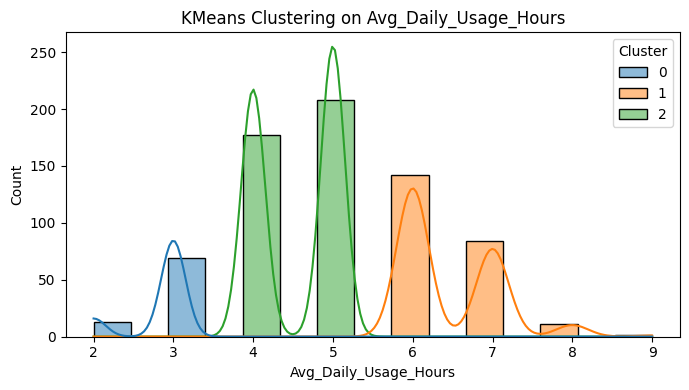

------------------------------------------------------------
🔍 Comparing 'Sleep_Hours_Per_Night' by 'Gender'


/tmp/ipython-input-60-2784742840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette='pastel')


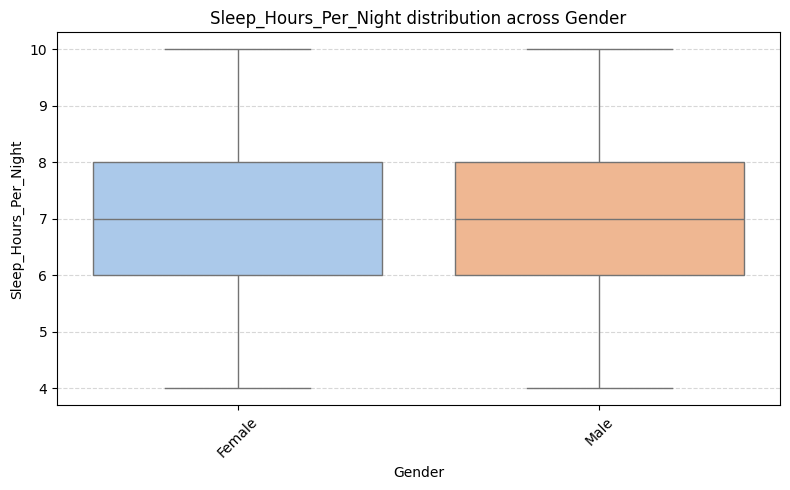

/tmp/ipython-input-60-2784742840.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x=cat_col, y=num_col, palette='Set2', alpha=0.7)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 34.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/

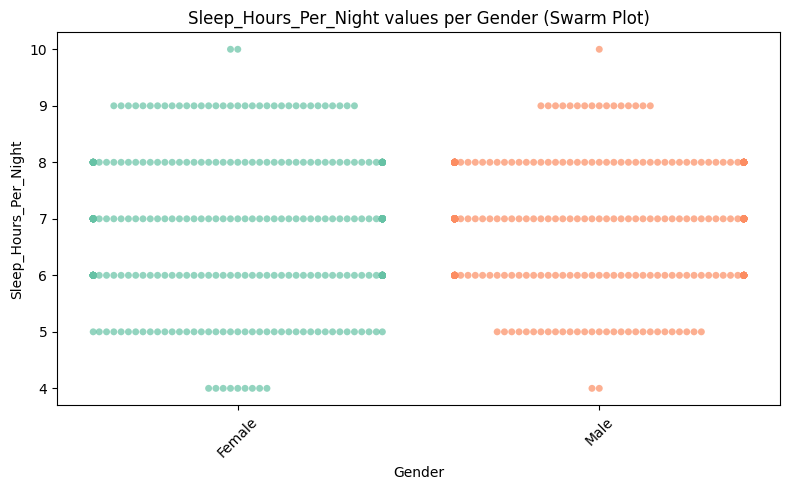

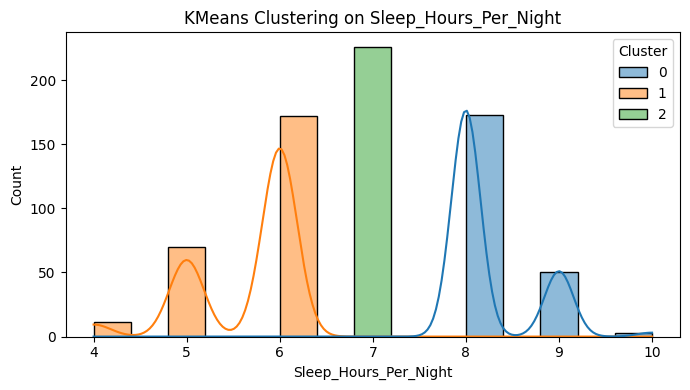

------------------------------------------------------------
🔍 Comparing 'Mental_Health_Score' by 'Gender'


/tmp/ipython-input-60-2784742840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette='pastel')


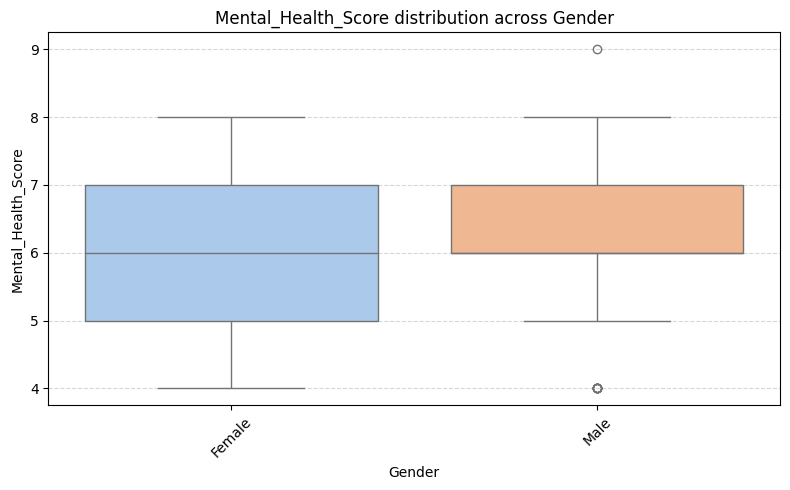

/tmp/ipython-input-60-2784742840.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x=cat_col, y=num_col, palette='Set2', alpha=0.7)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 32.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/

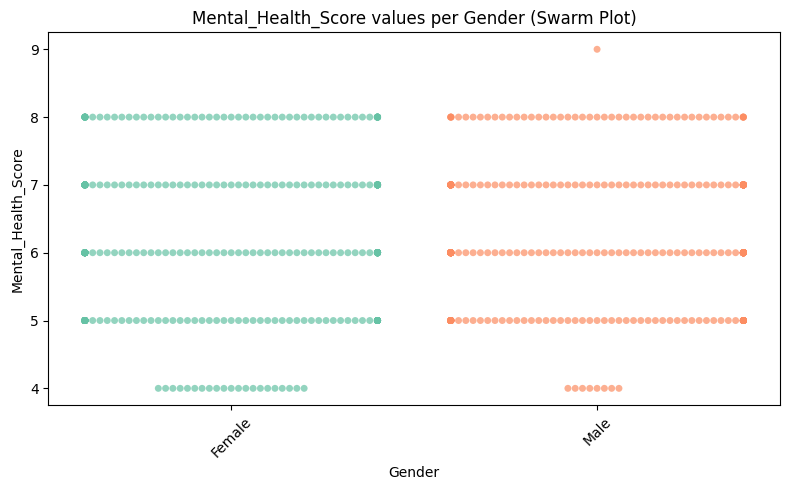

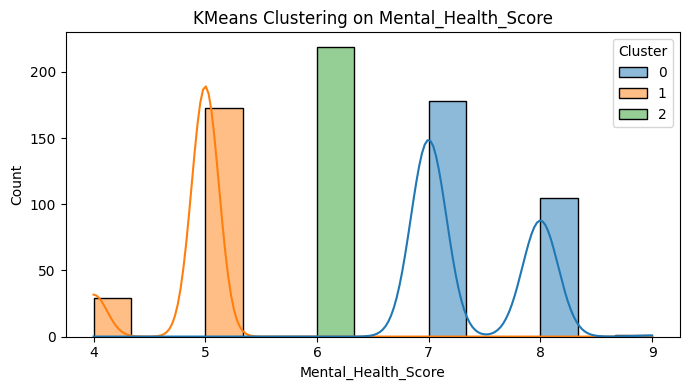

------------------------------------------------------------
🔍 Comparing 'Conflicts_Over_Social_Media' by 'Gender'


/tmp/ipython-input-60-2784742840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette='pastel')


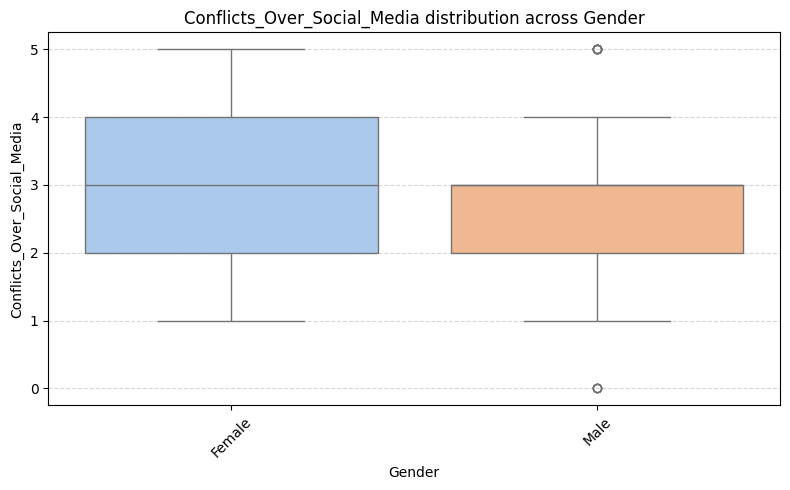

/tmp/ipython-input-60-2784742840.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x=cat_col, y=num_col, palette='Set2', alpha=0.7)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 39.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/

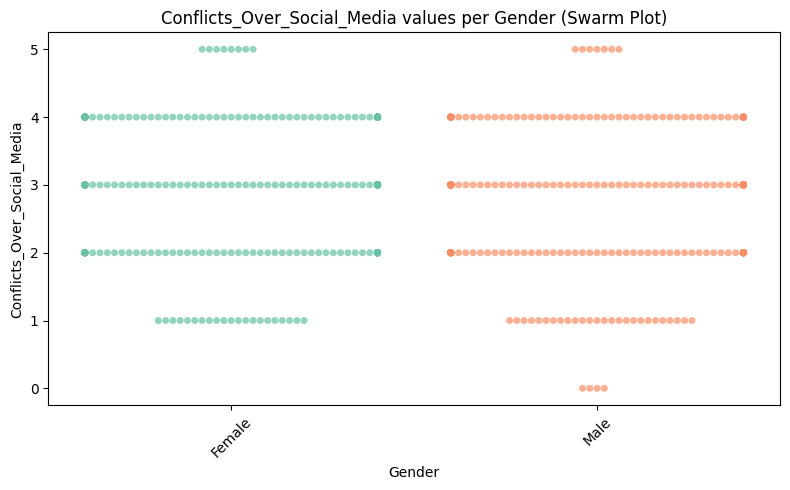

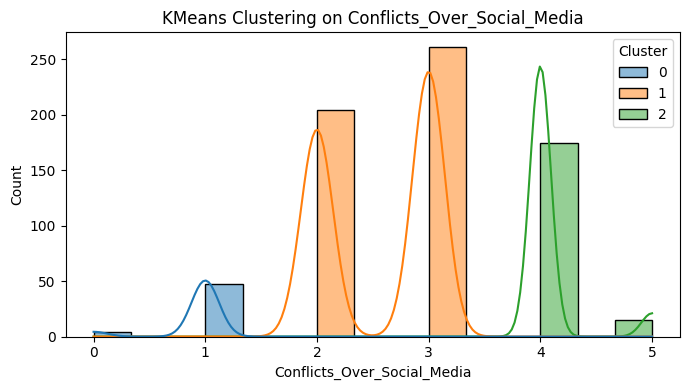

------------------------------------------------------------
🔍 Comparing 'Age' by 'Academic_Level'


/tmp/ipython-input-60-2784742840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette='pastel')


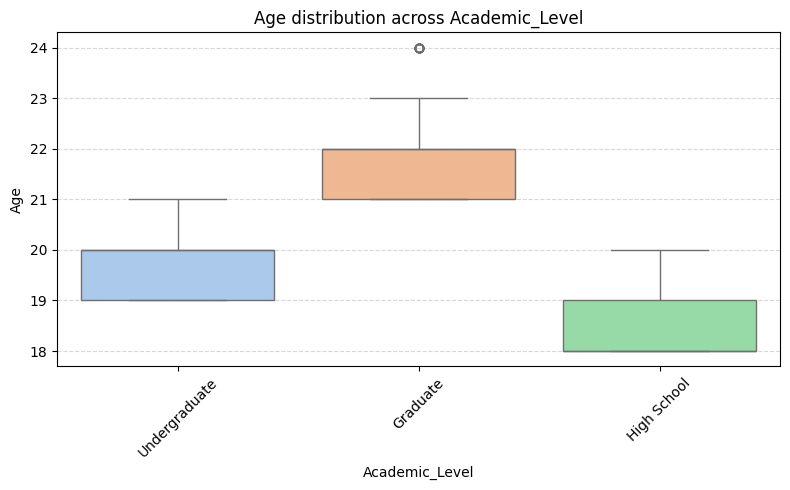

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 73.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 77.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 67.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 77.1% of the points cannot be plac

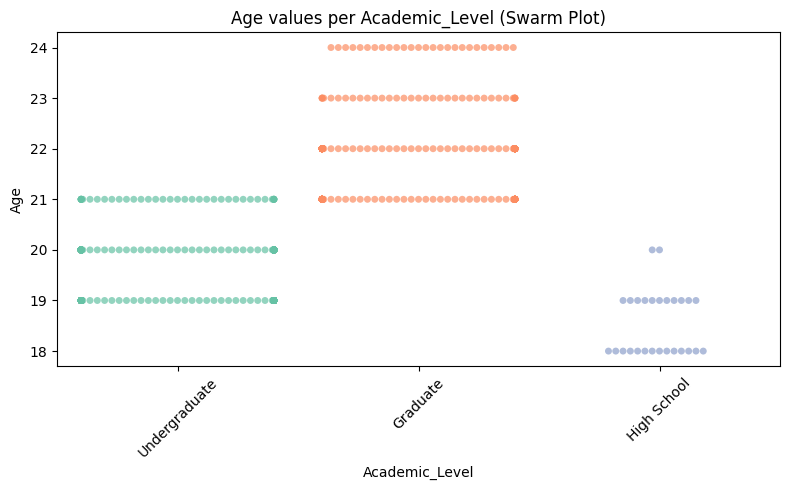

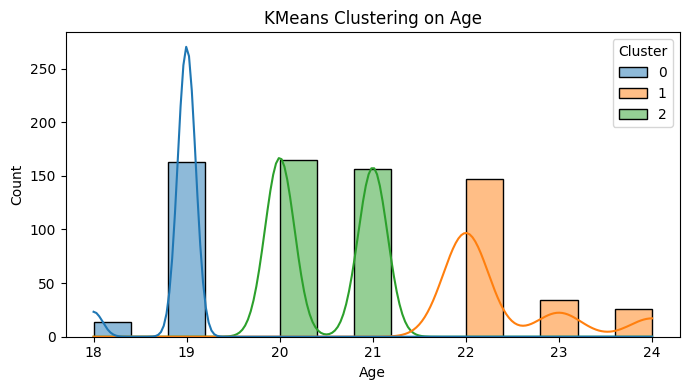

------------------------------------------------------------
🔍 Comparing 'Avg_Daily_Usage_Hours' by 'Academic_Level'


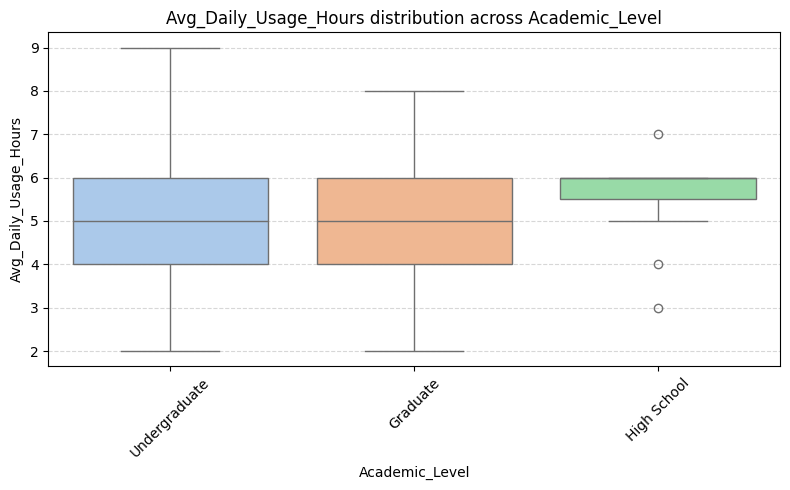

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 52.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 57.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 55.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 57.8% of the points cannot be plac

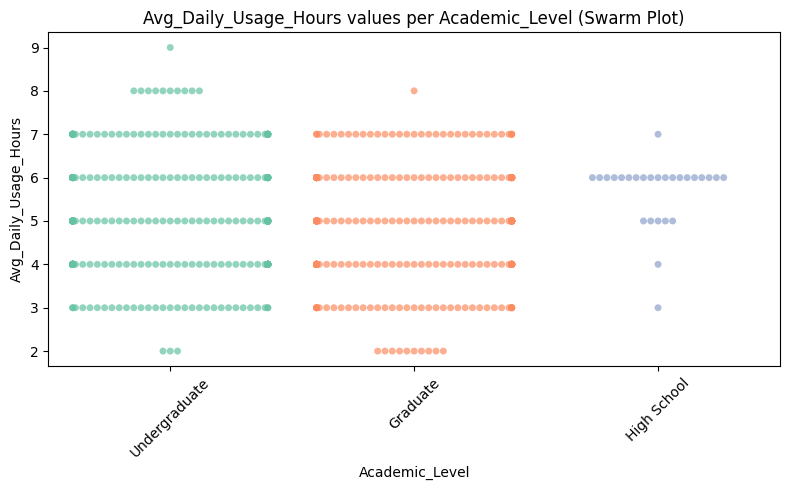

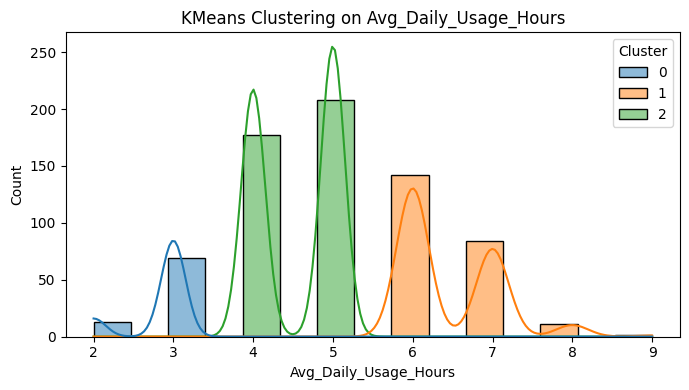

------------------------------------------------------------
🔍 Comparing 'Sleep_Hours_Per_Night' by 'Academic_Level'


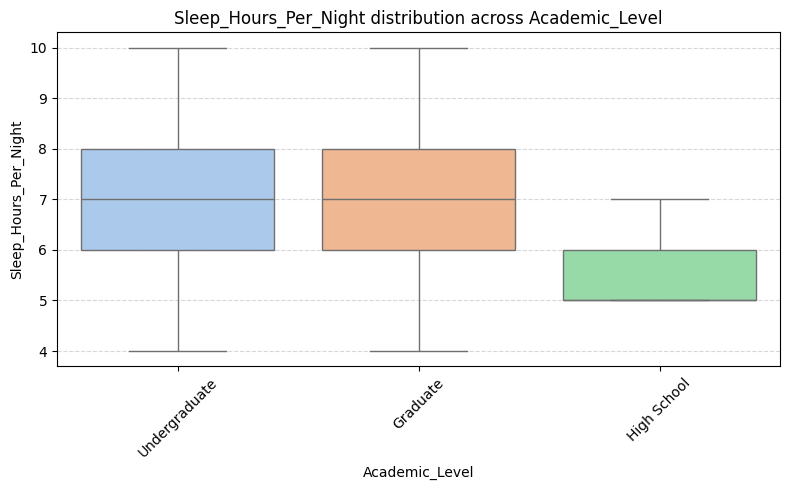

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 53.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 58.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 62.5% of the points cannot be plac

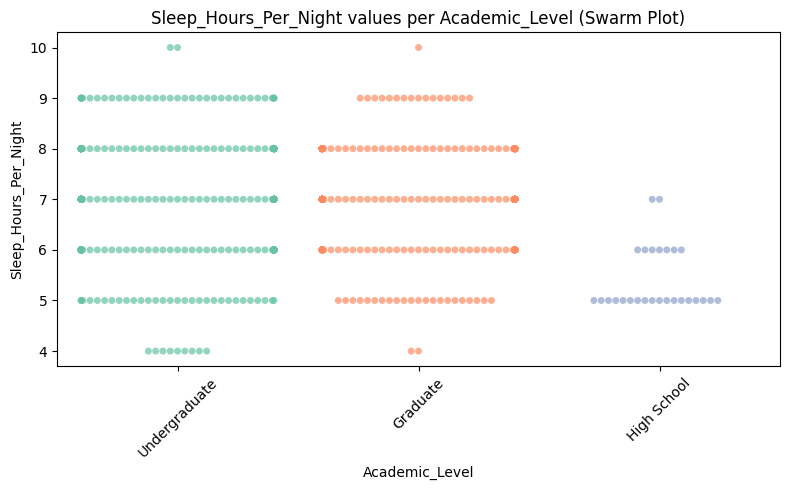

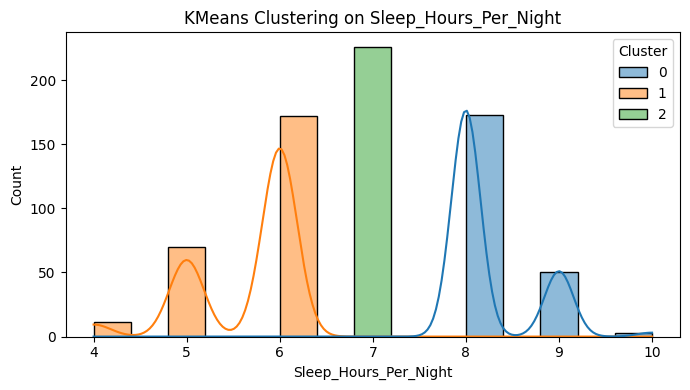

------------------------------------------------------------
🔍 Comparing 'Mental_Health_Score' by 'Academic_Level'


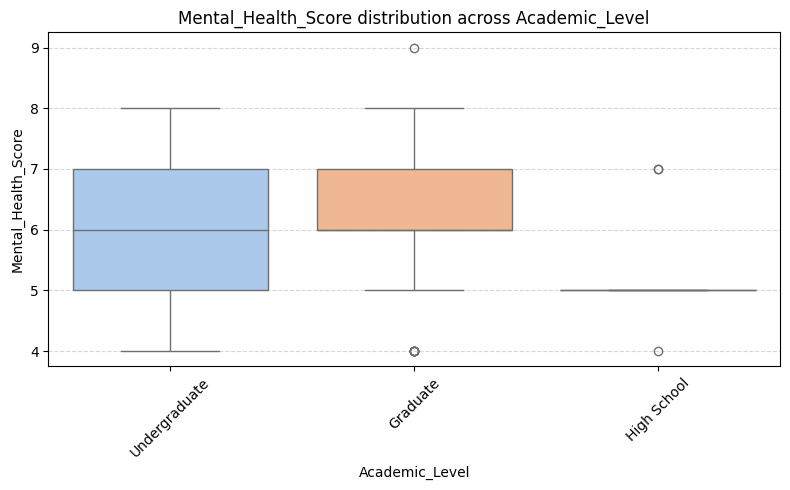

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 58.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 59.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 63.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 64.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 63.2% of the points cannot be plac

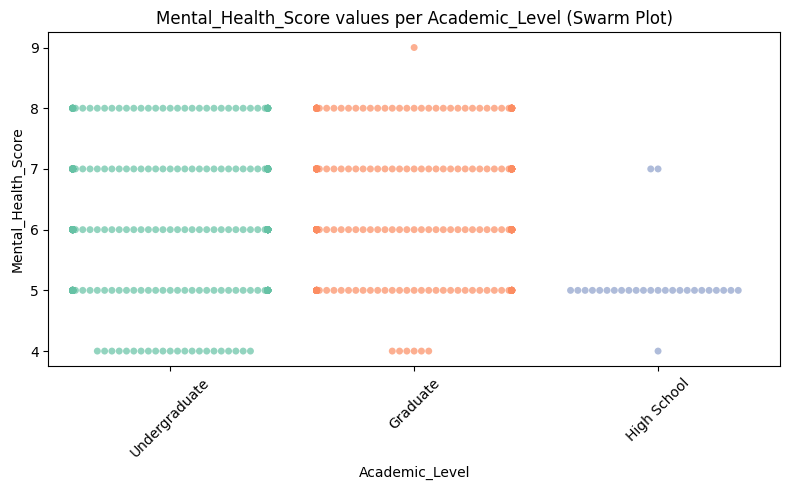

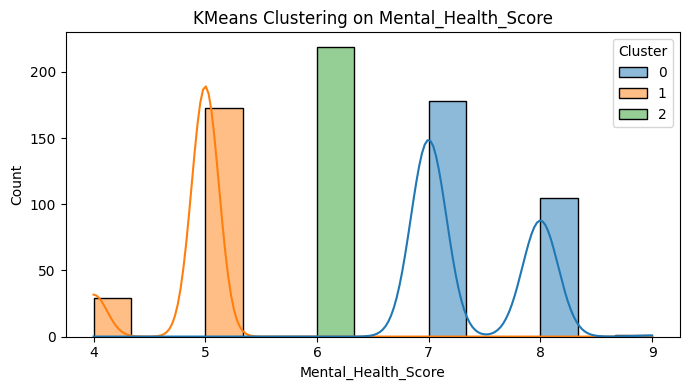

------------------------------------------------------------
🔍 Comparing 'Conflicts_Over_Social_Media' by 'Academic_Level'


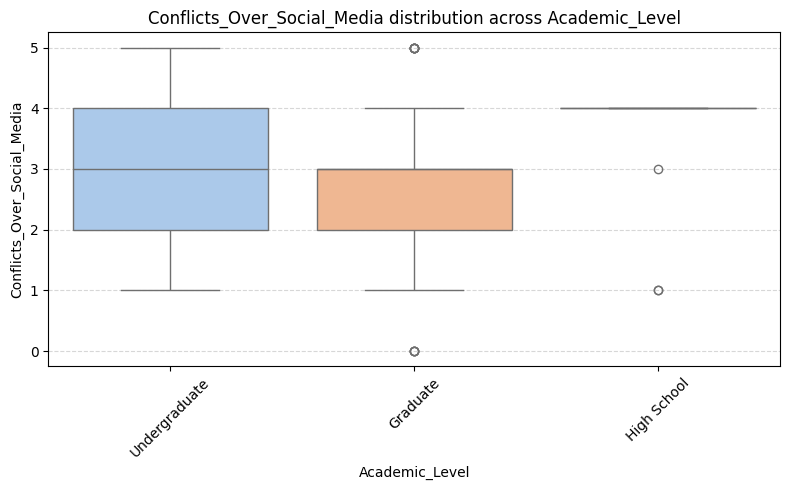

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 59.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 70.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 63.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 70.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


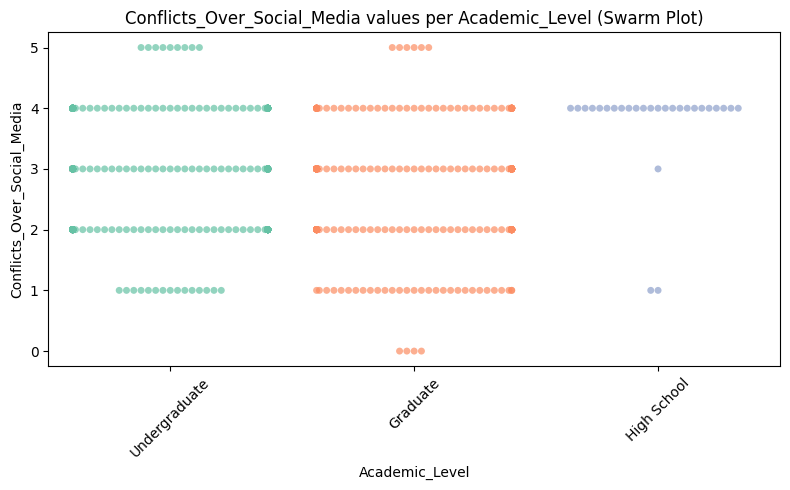

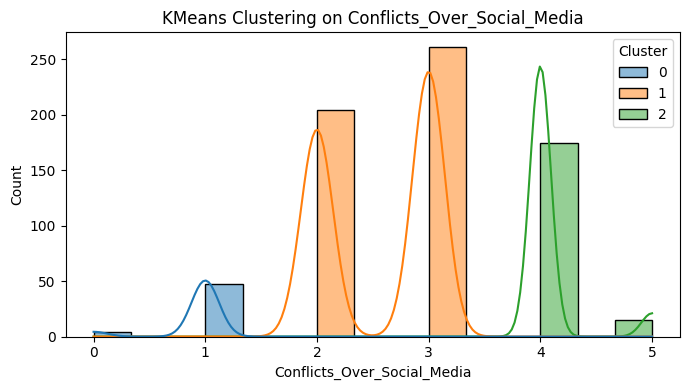

------------------------------------------------------------
🔍 Comparing 'Age' by 'Country'


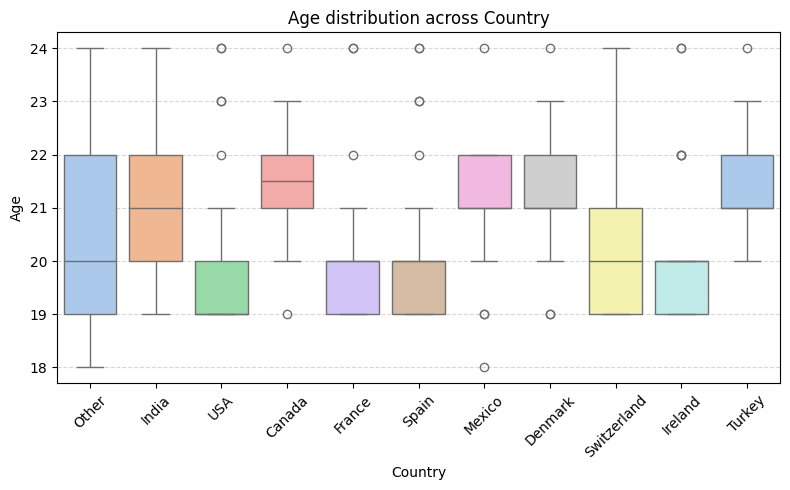

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 87.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 45.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be plac

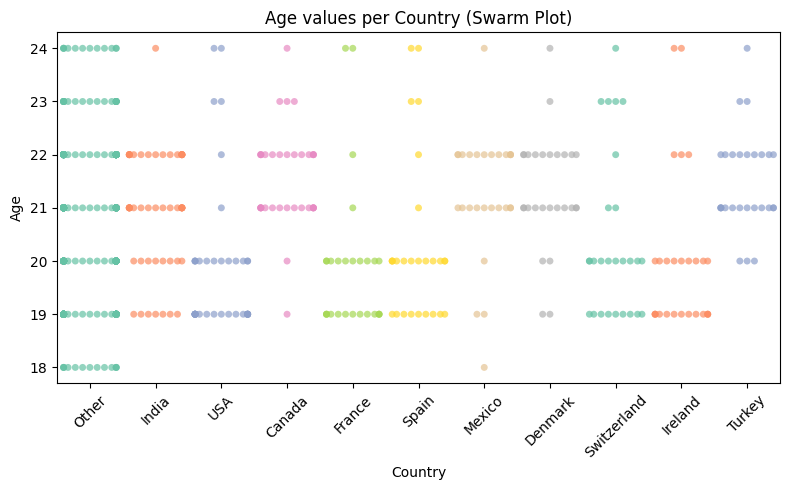

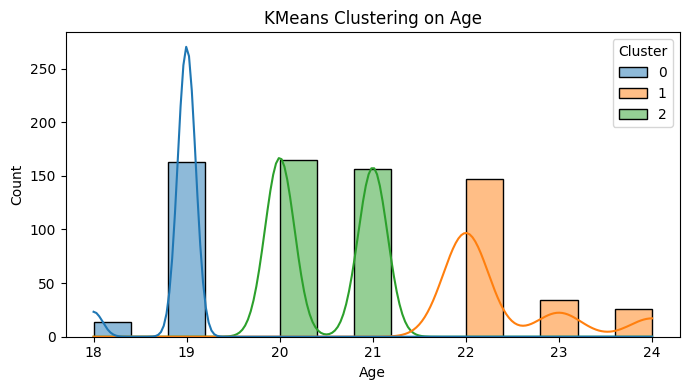

------------------------------------------------------------
🔍 Comparing 'Avg_Daily_Usage_Hours' by 'Country'


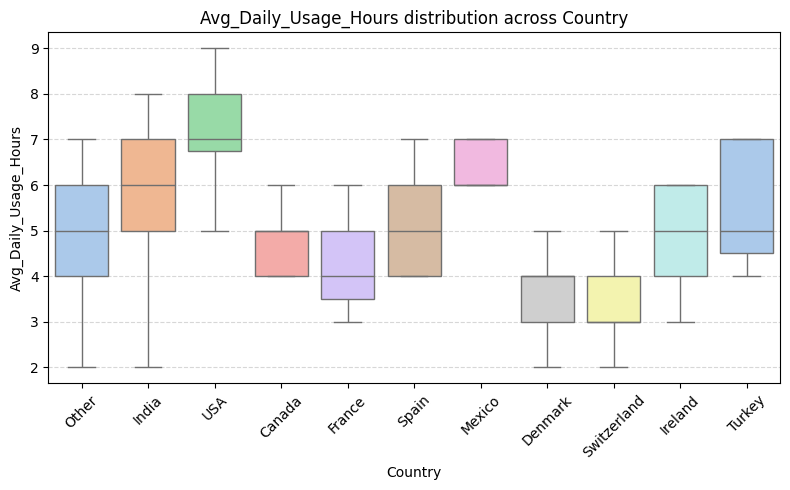

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 89.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 54.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 18.5% of the points cannot be plac

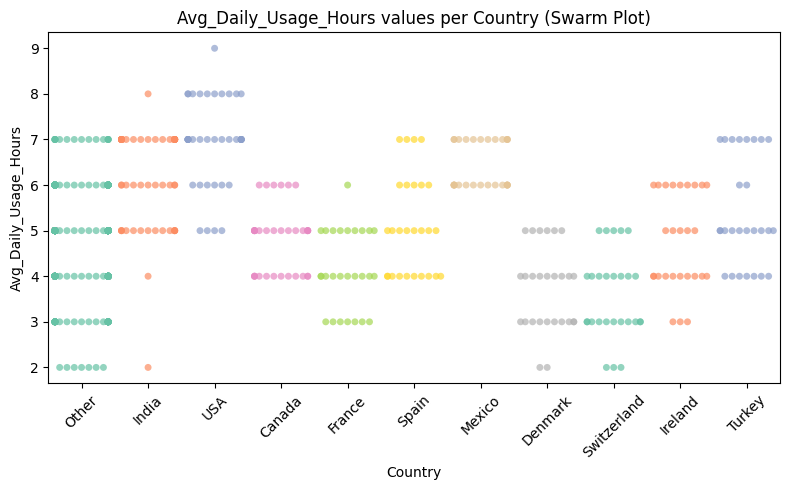

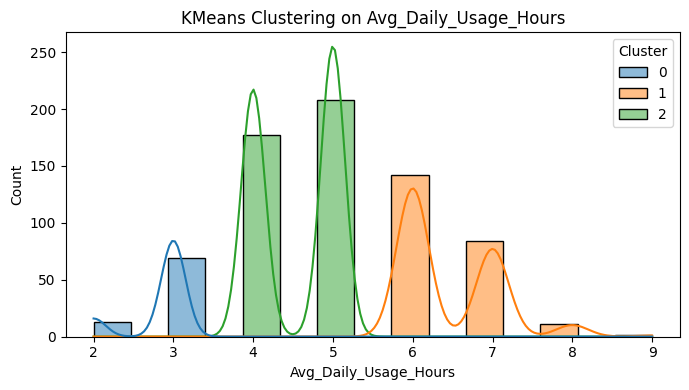

------------------------------------------------------------
🔍 Comparing 'Sleep_Hours_Per_Night' by 'Country'


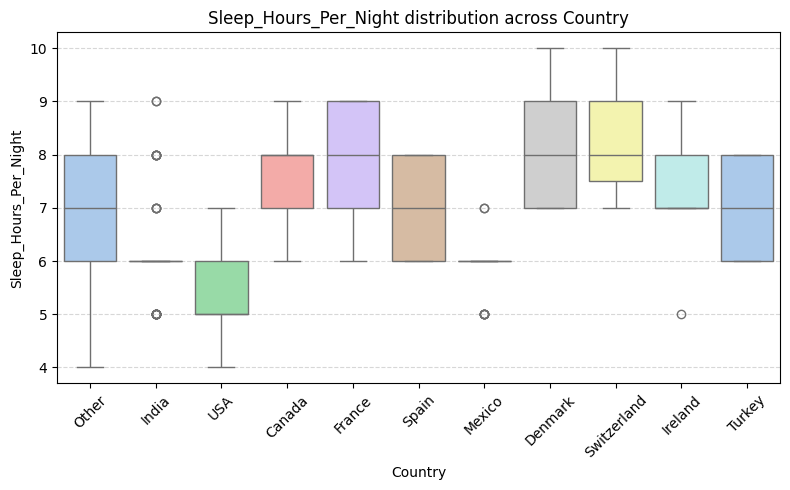

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 90.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 50.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 18.5% of the points cannot be plac

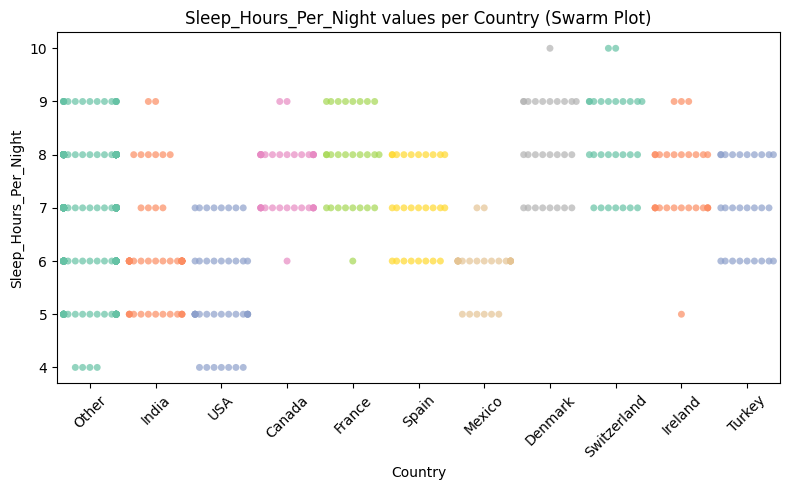

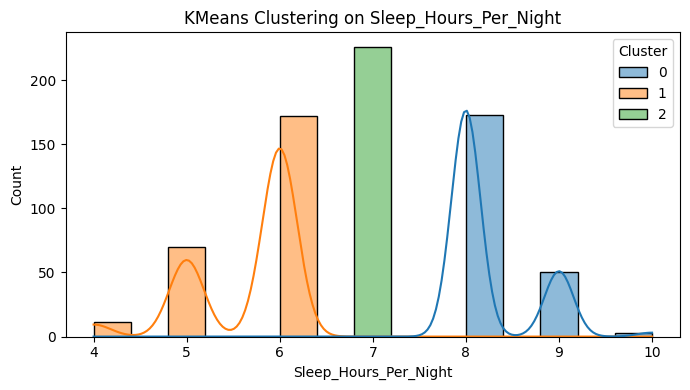

------------------------------------------------------------
🔍 Comparing 'Mental_Health_Score' by 'Country'


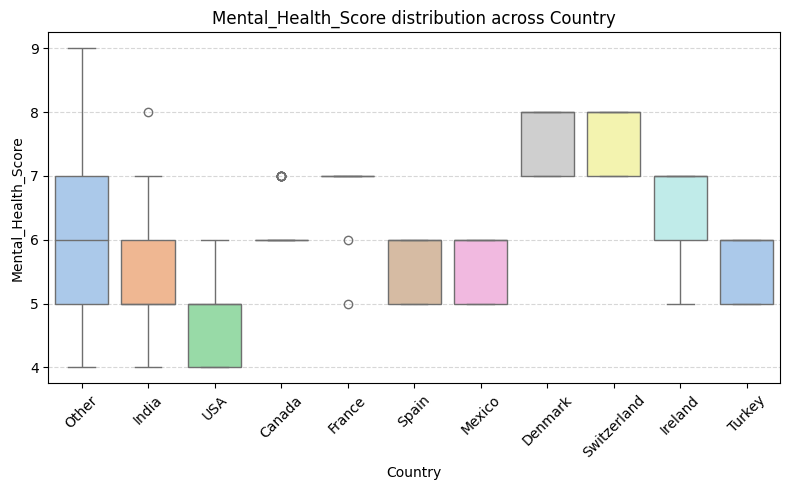

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 90.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 45.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 47.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 66.7% of the points cannot be plac

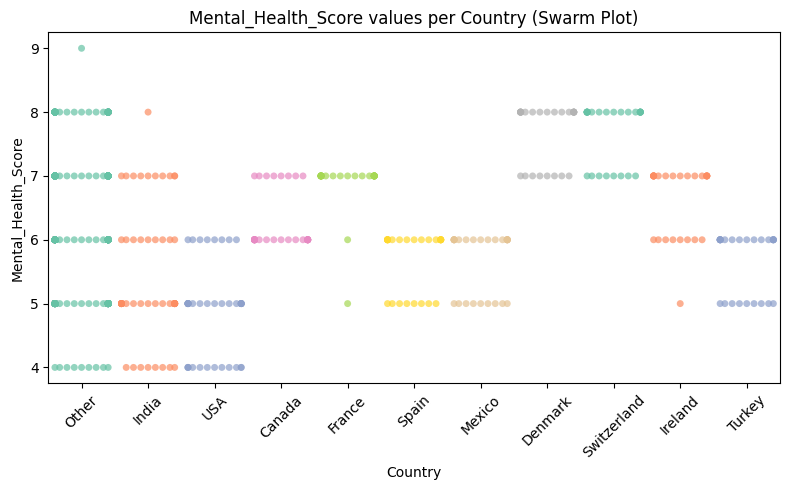

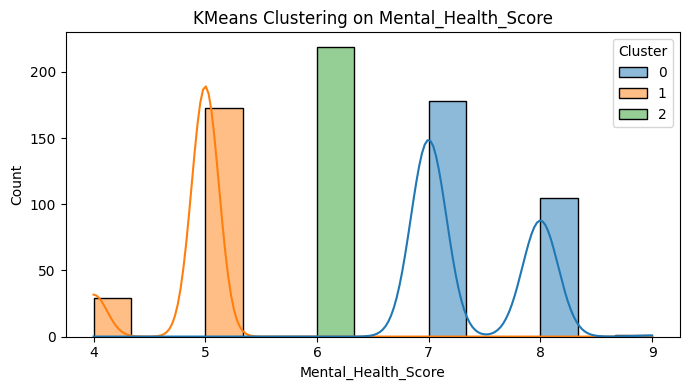

------------------------------------------------------------
🔍 Comparing 'Conflicts_Over_Social_Media' by 'Country'


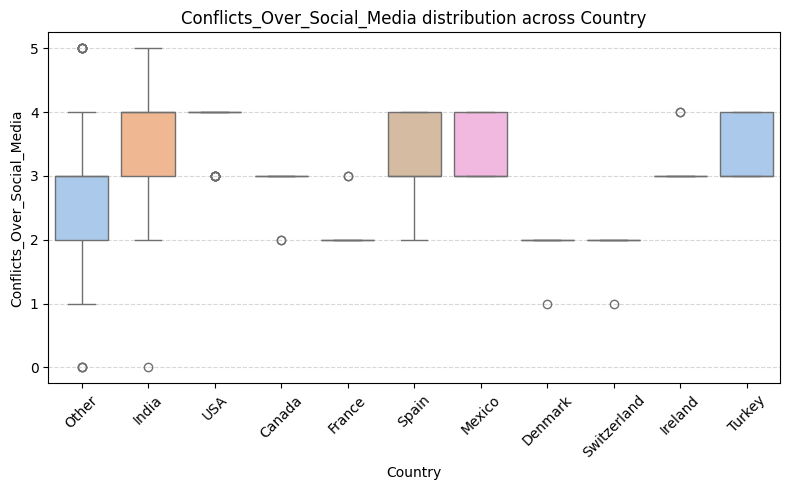

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 90.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 45.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 73.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 66.7% of the points cannot be plac

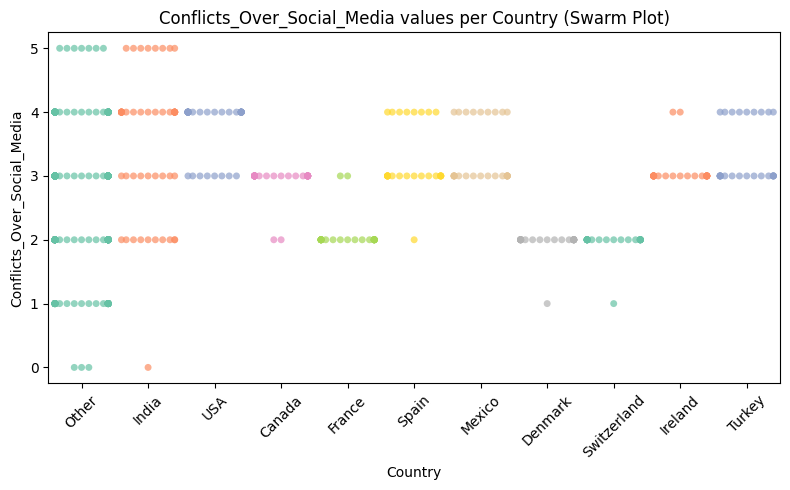

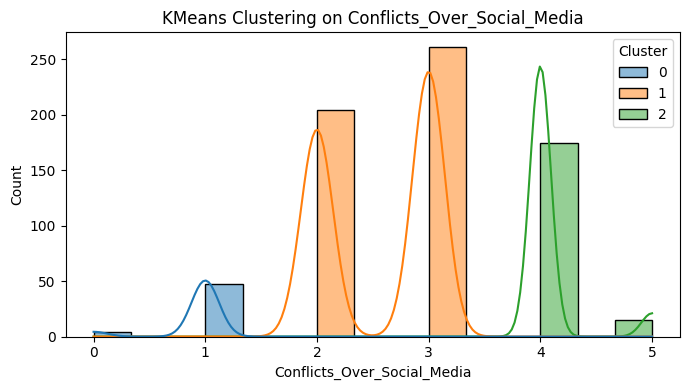

------------------------------------------------------------
🔍 Comparing 'Age' by 'Most_Used_Platform'


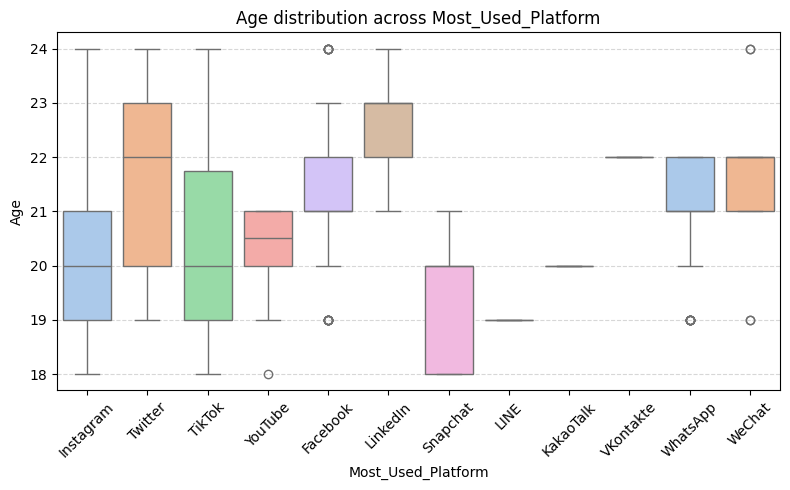

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 87.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 77.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 75.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 28.6% of the points cannot be place

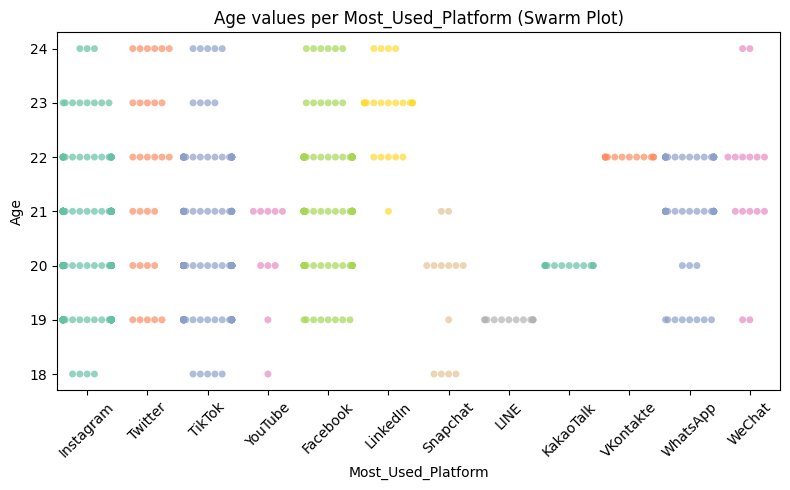

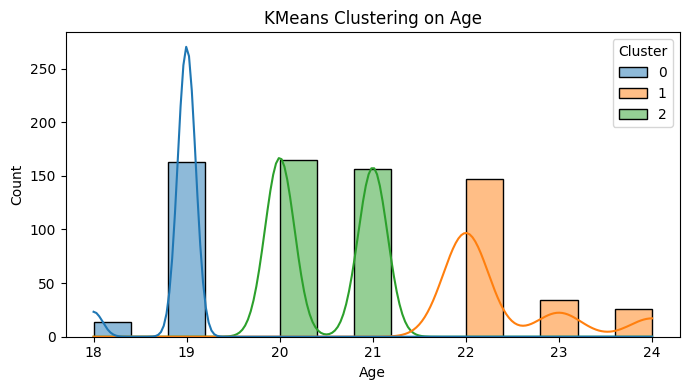

------------------------------------------------------------
🔍 Comparing 'Avg_Daily_Usage_Hours' by 'Most_Used_Platform'


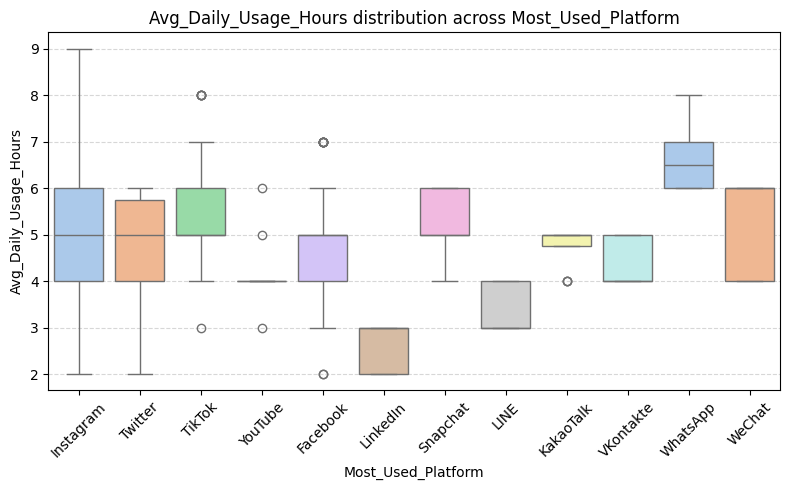

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 86.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 46.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 83.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 78.0% of the points cannot be plac

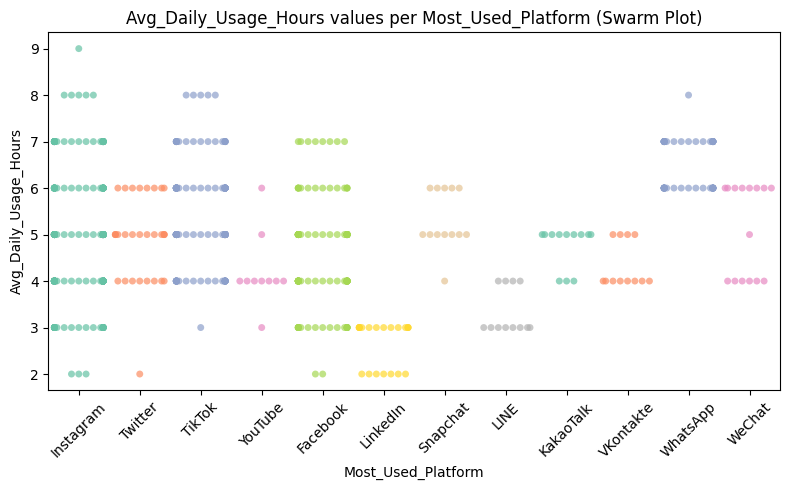

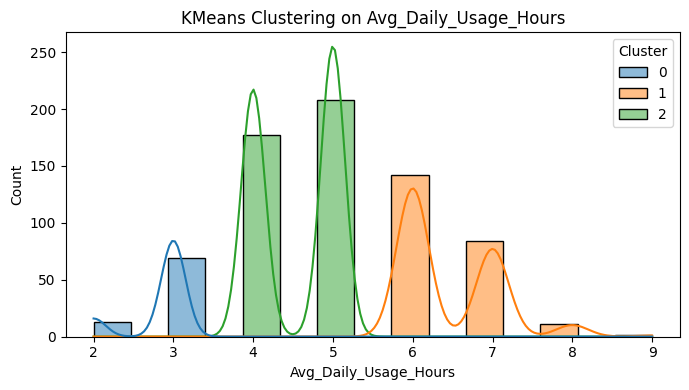

------------------------------------------------------------
🔍 Comparing 'Sleep_Hours_Per_Night' by 'Most_Used_Platform'


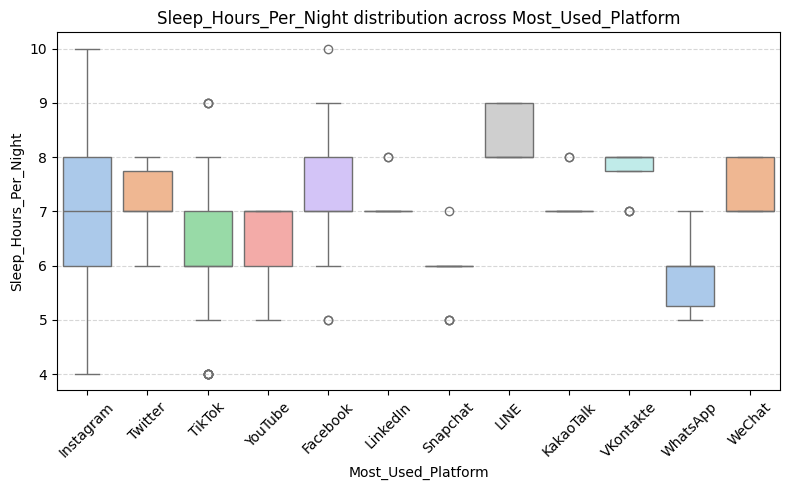

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 53.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 81.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 81.3% of the points cannot be plac

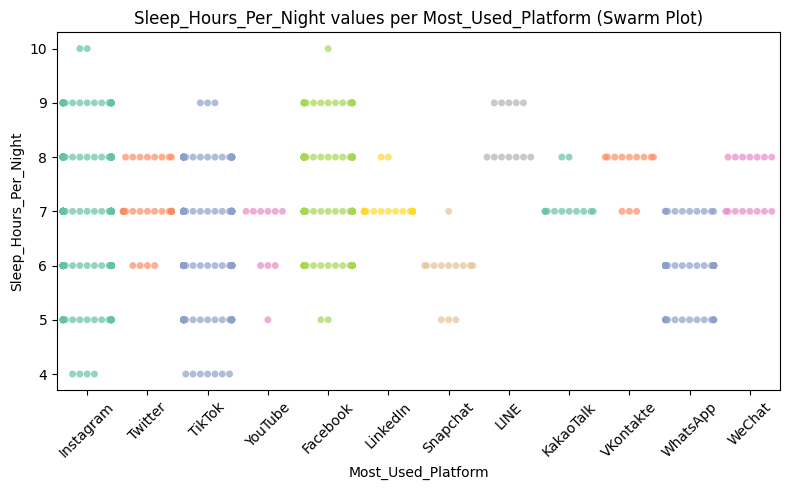

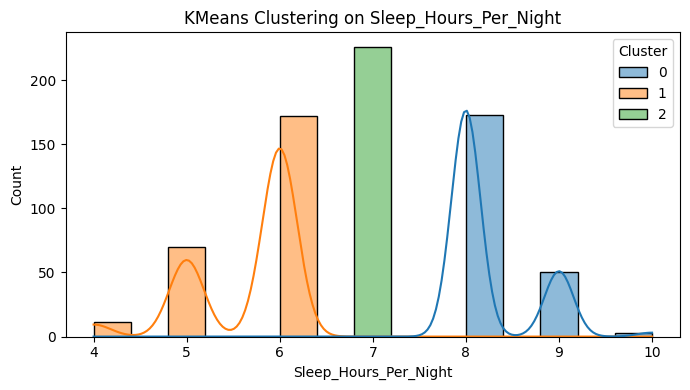

------------------------------------------------------------
🔍 Comparing 'Mental_Health_Score' by 'Most_Used_Platform'


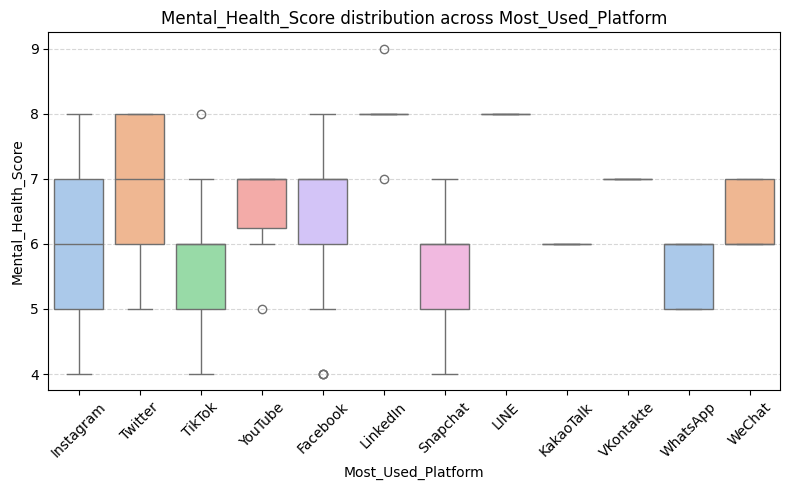

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 90.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 81.3% of the points cannot be plac

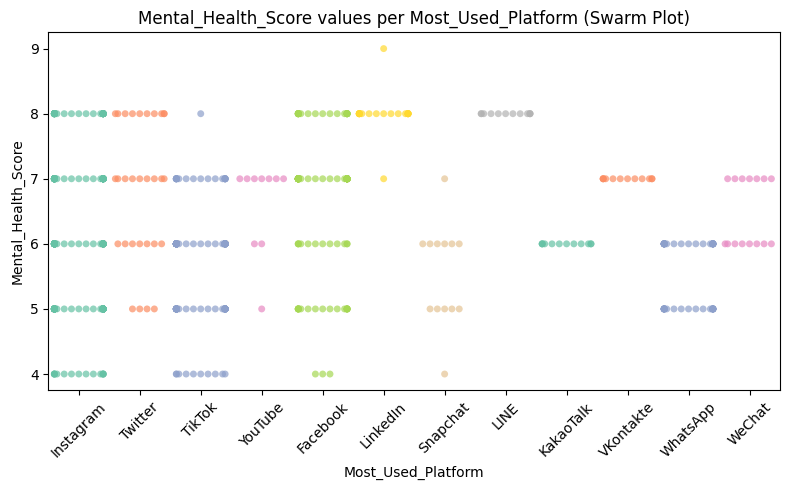

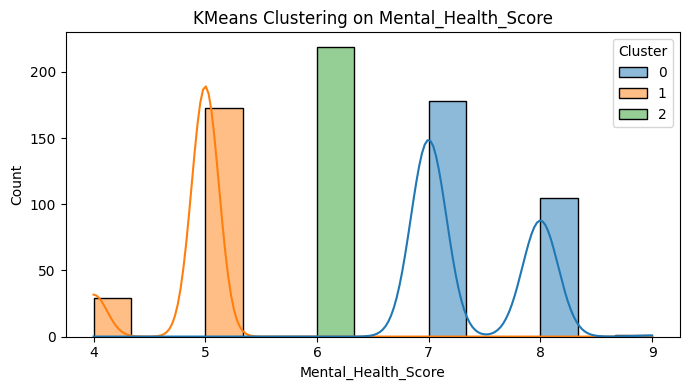

------------------------------------------------------------
🔍 Comparing 'Conflicts_Over_Social_Media' by 'Most_Used_Platform'


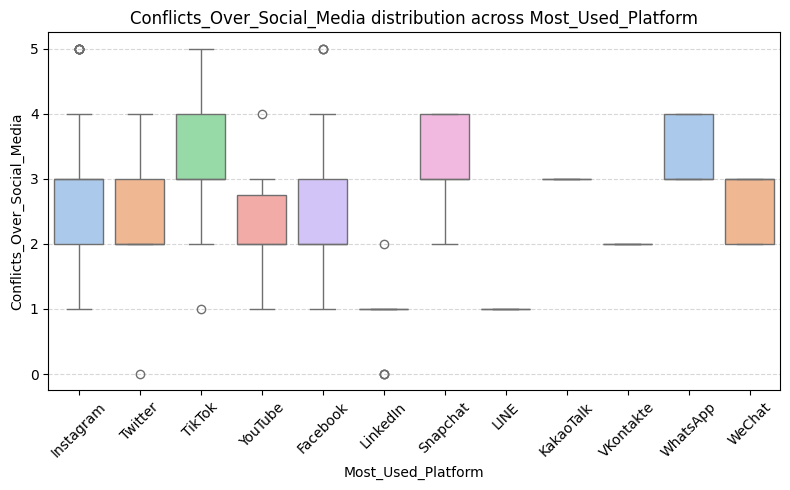

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 90.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 87.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 81.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 57.1% of the points cannot be plac

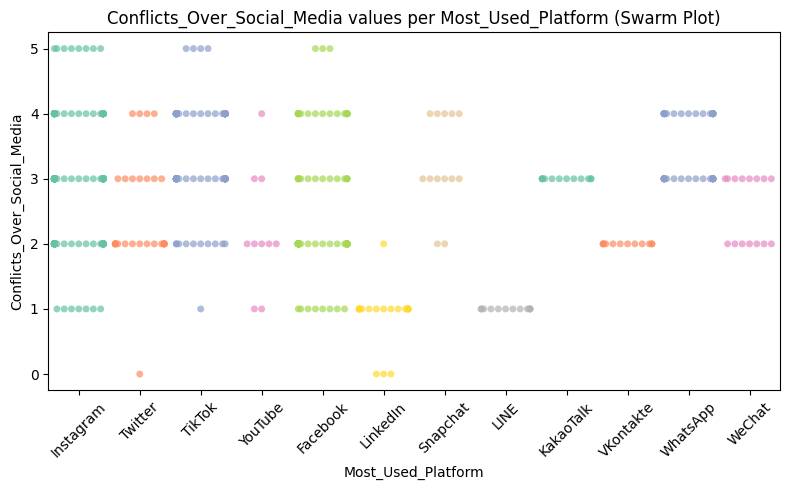

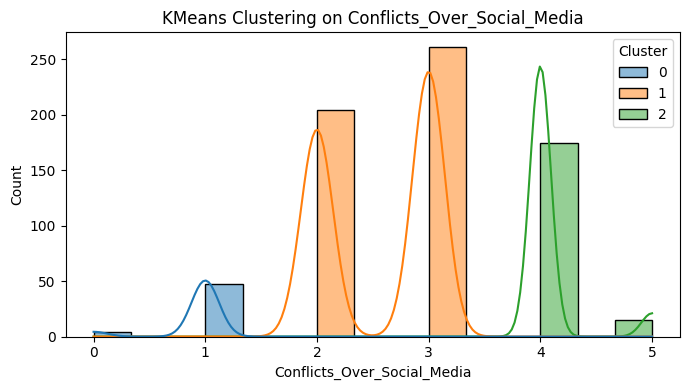

------------------------------------------------------------
🔍 Comparing 'Age' by 'Affects_Academic_Performance'


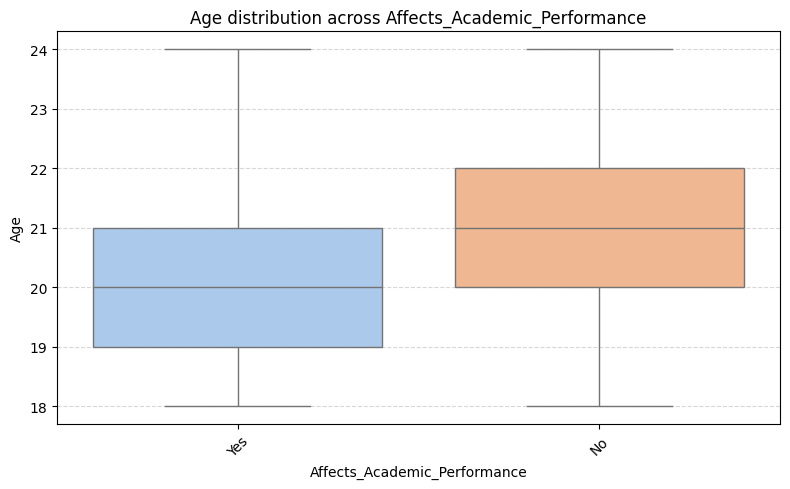

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 37.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 24.6% of the points cannot be plac

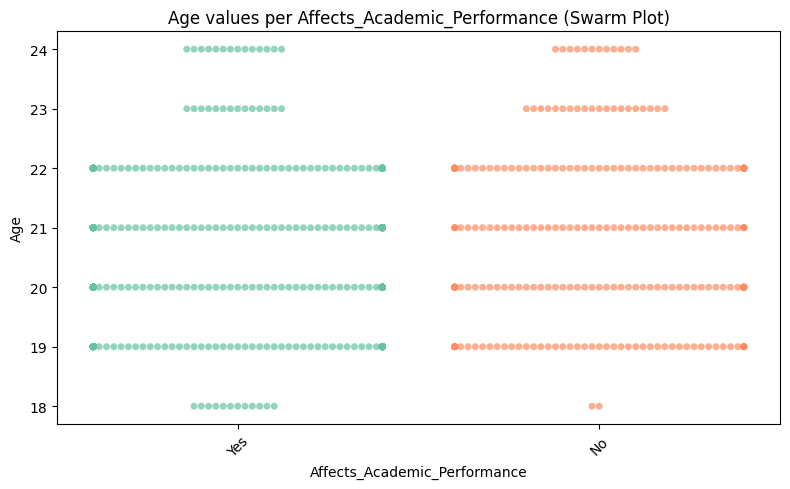

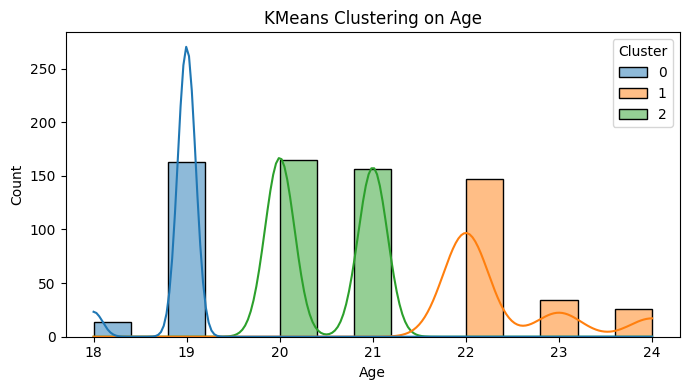

------------------------------------------------------------
🔍 Comparing 'Avg_Daily_Usage_Hours' by 'Affects_Academic_Performance'


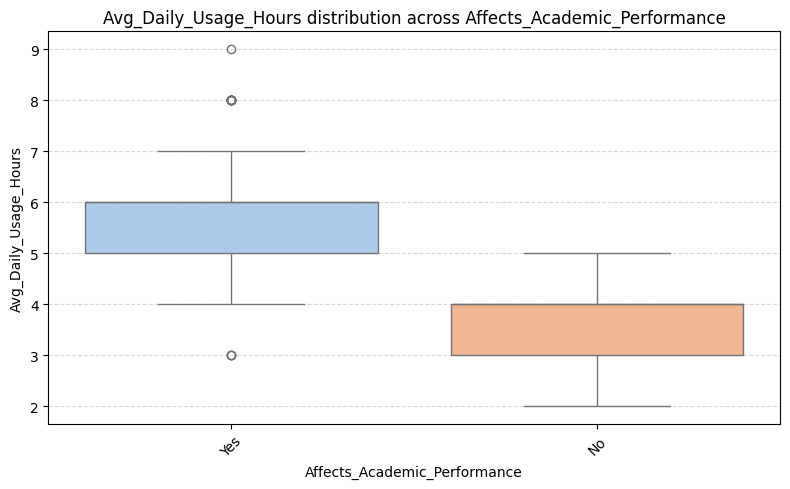

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 42.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 60.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 60.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 46.0% of the points cannot be plac

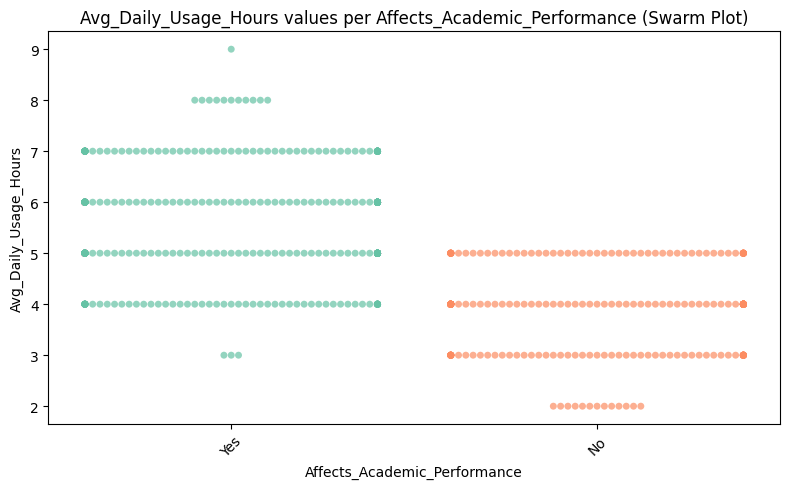

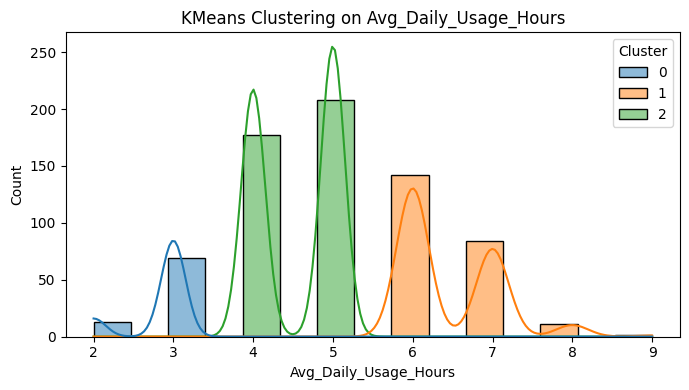

------------------------------------------------------------
🔍 Comparing 'Sleep_Hours_Per_Night' by 'Affects_Academic_Performance'


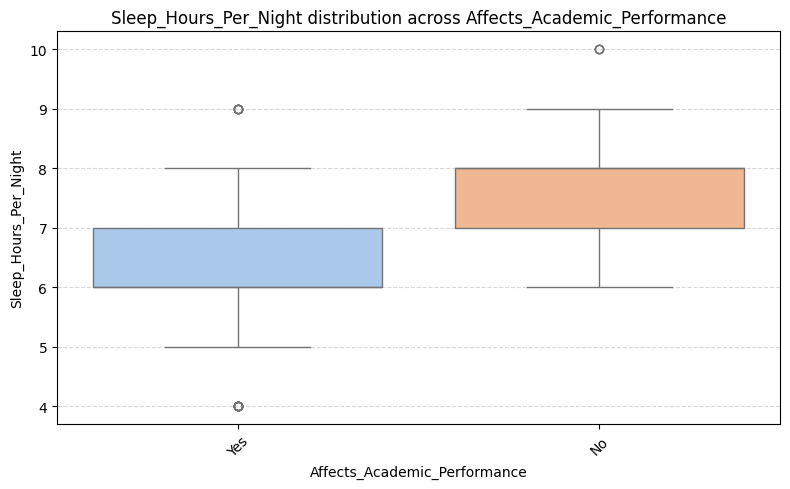

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 42.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 32.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 62.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 52.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


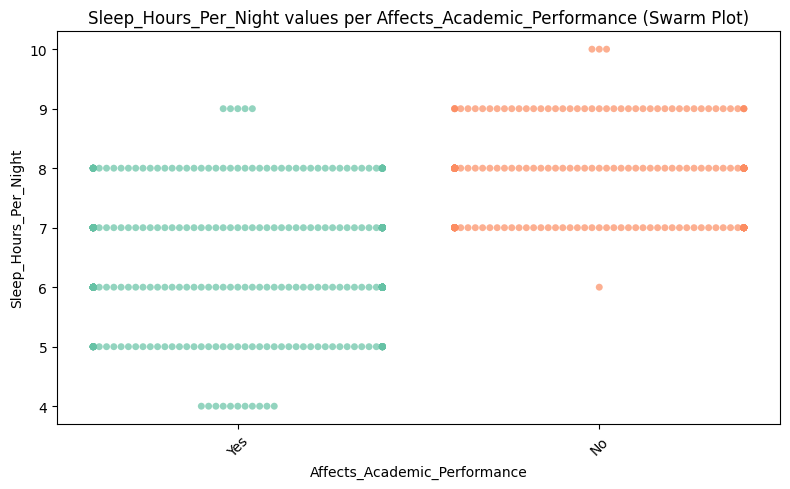

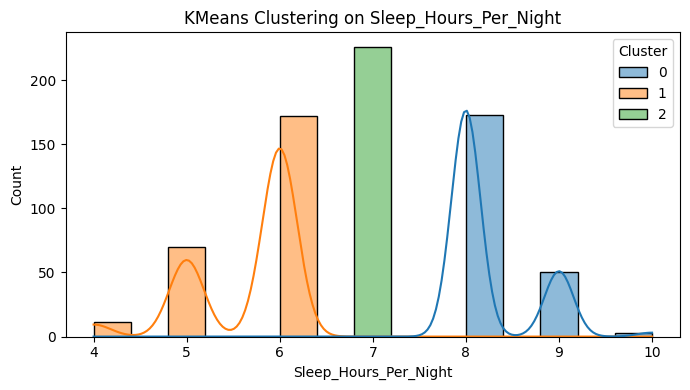

------------------------------------------------------------
🔍 Comparing 'Mental_Health_Score' by 'Affects_Academic_Performance'


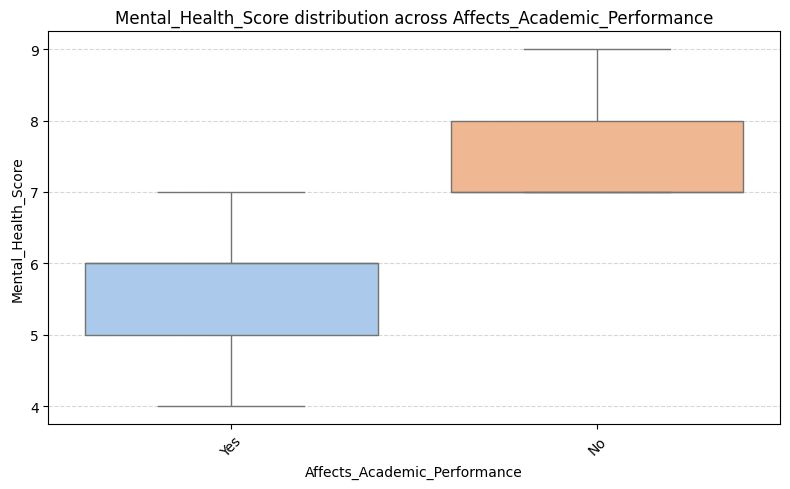

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 59.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 51.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 68.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 67.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 68.4% of the points cannot be plac

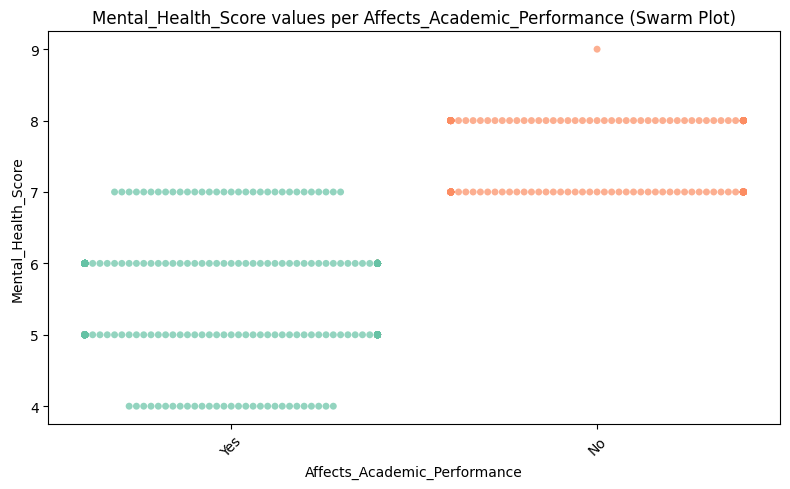

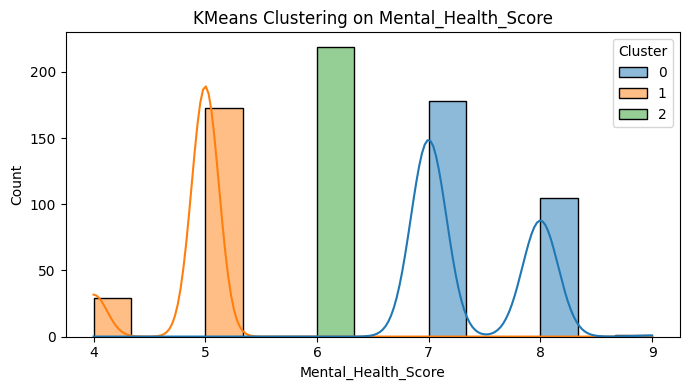

------------------------------------------------------------
🔍 Comparing 'Conflicts_Over_Social_Media' by 'Affects_Academic_Performance'


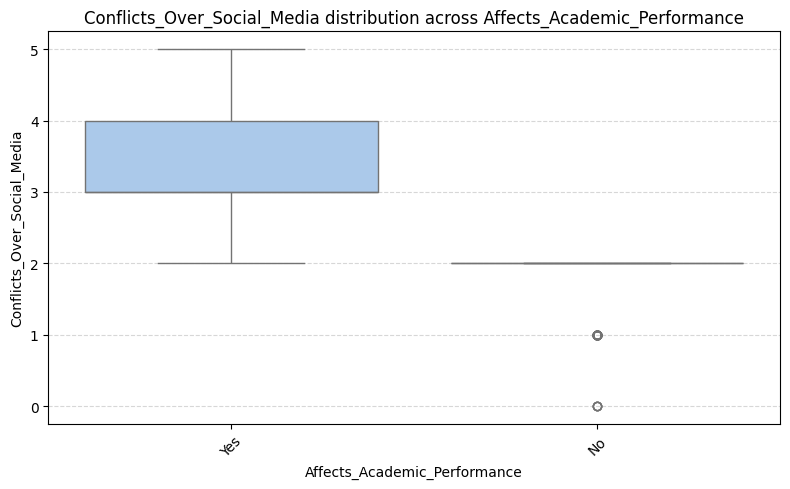

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 69.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 77.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 65.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 77.9% of the points cannot be plac

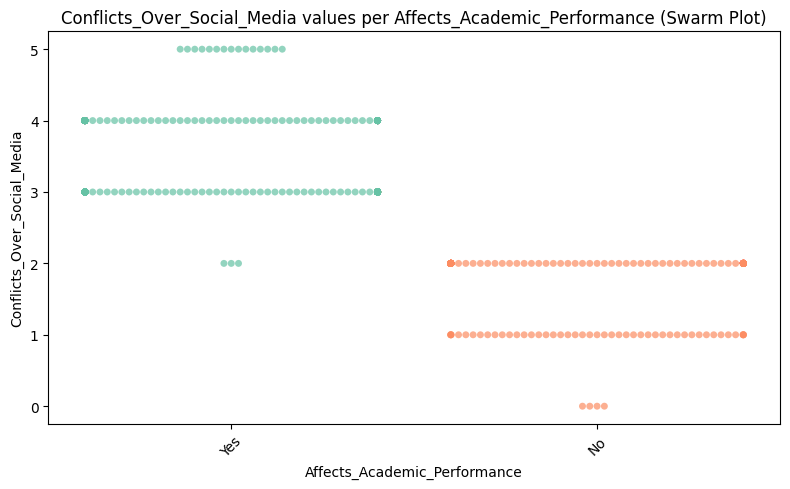

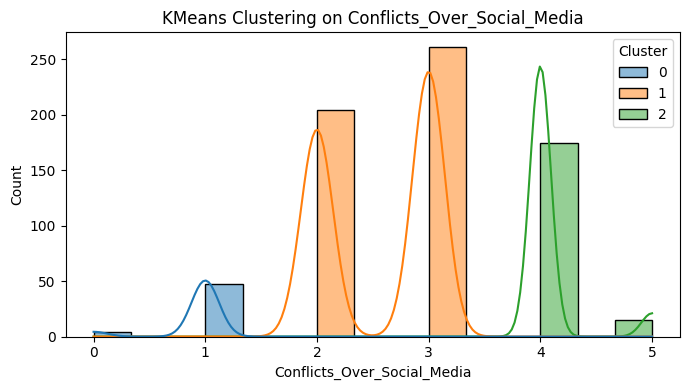

------------------------------------------------------------
🔍 Comparing 'Age' by 'Relationship_Status'


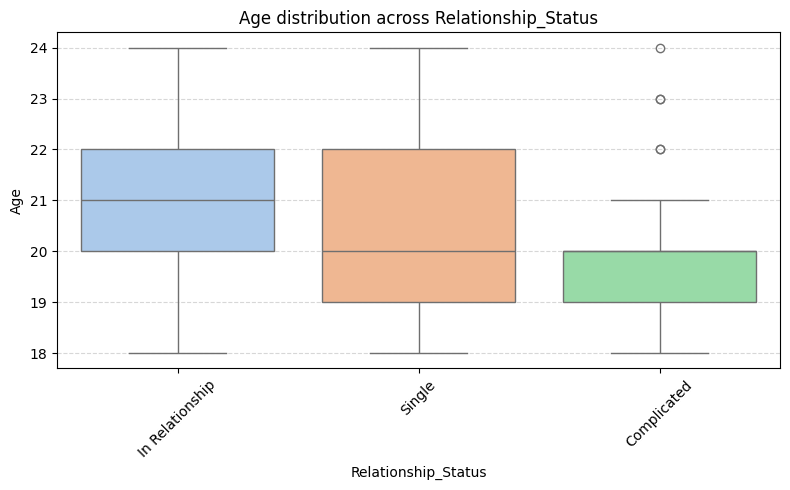

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 57.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 52.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 61.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 61.5% of the points cannot be plac

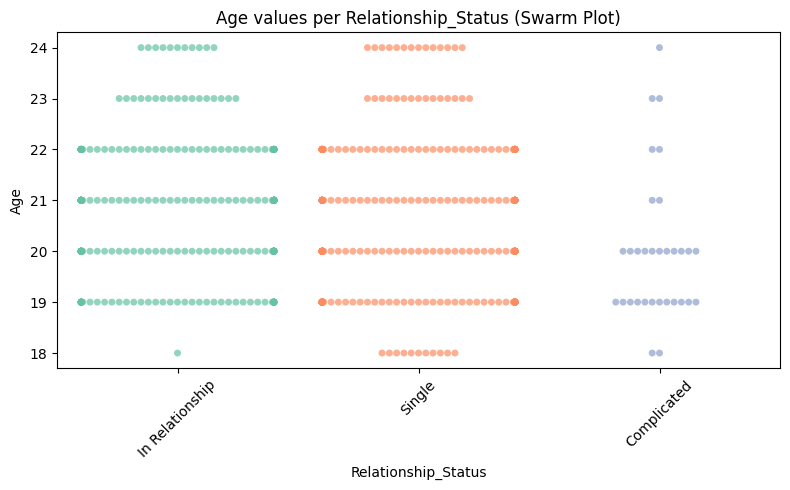

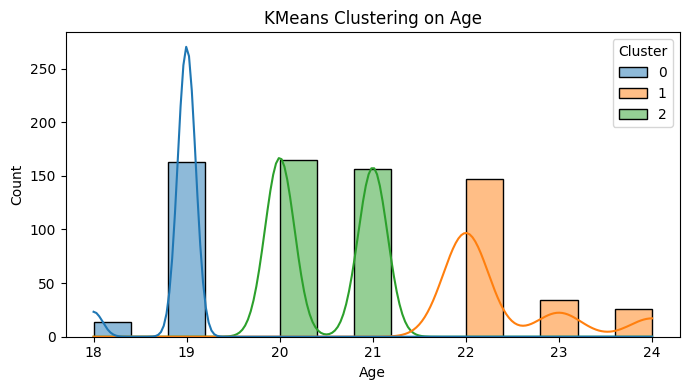

------------------------------------------------------------
🔍 Comparing 'Avg_Daily_Usage_Hours' by 'Relationship_Status'


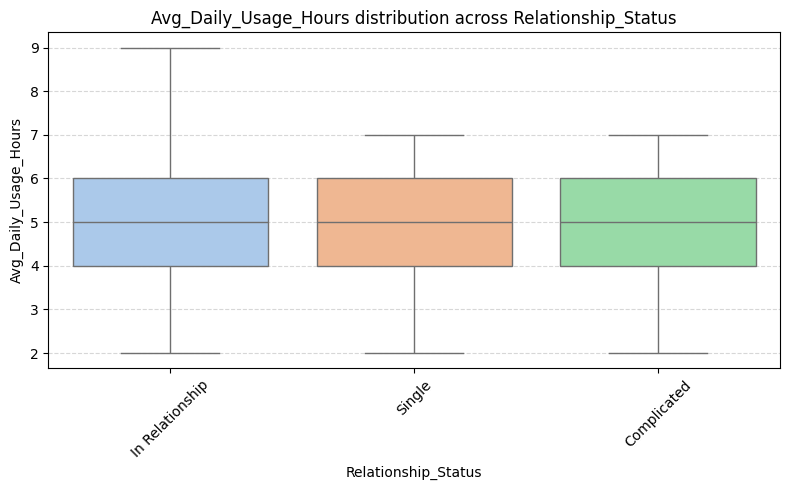

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 40.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 57.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 63.0% of the points cannot be plac

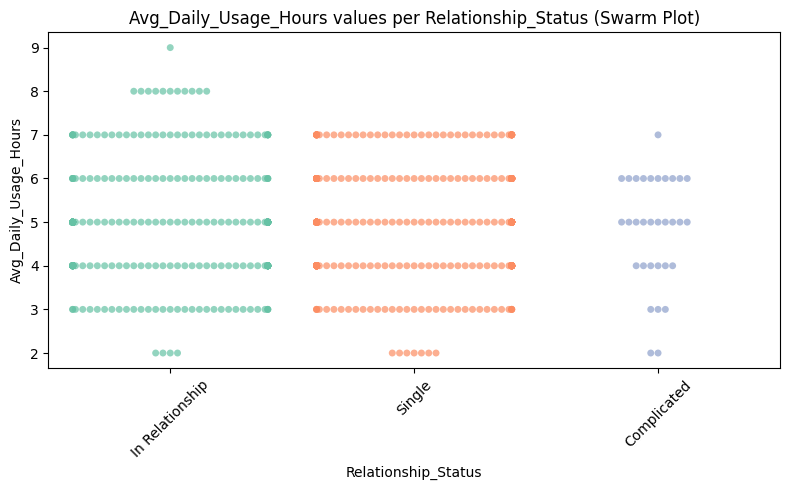

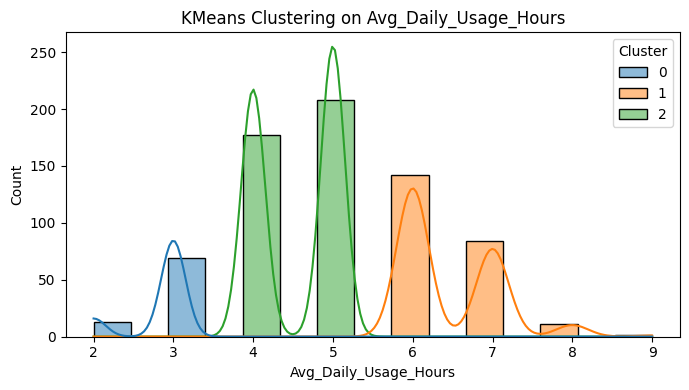

------------------------------------------------------------
🔍 Comparing 'Sleep_Hours_Per_Night' by 'Relationship_Status'


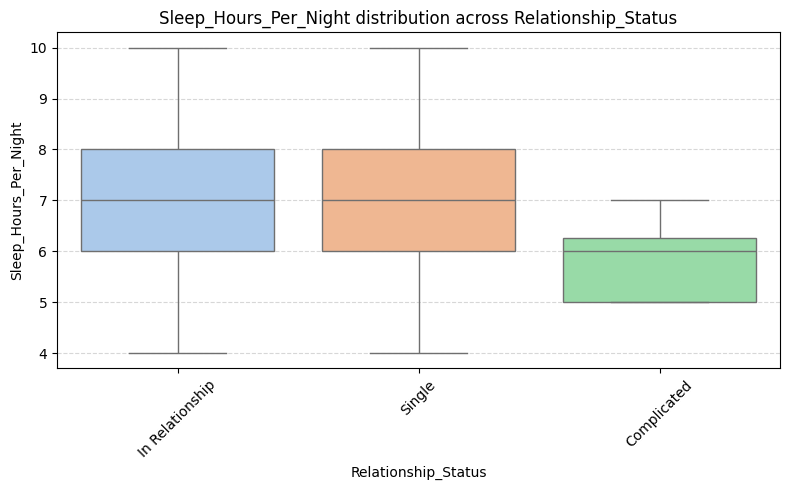

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 60.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 64.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 51.9% of the points cannot be plac

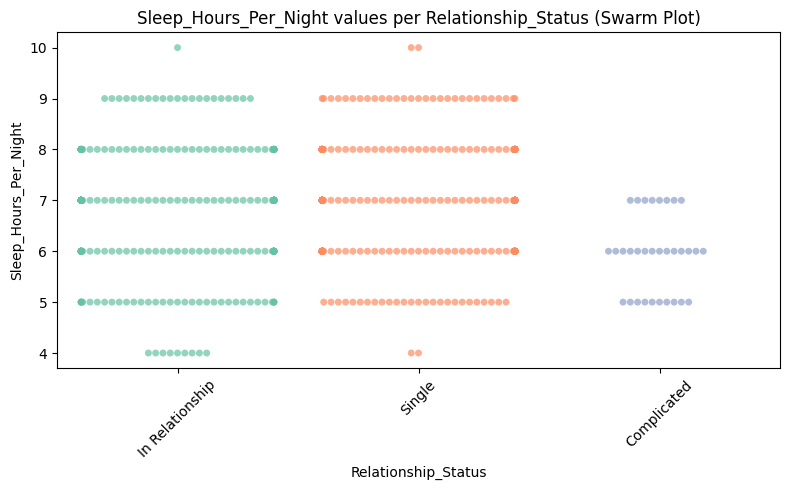

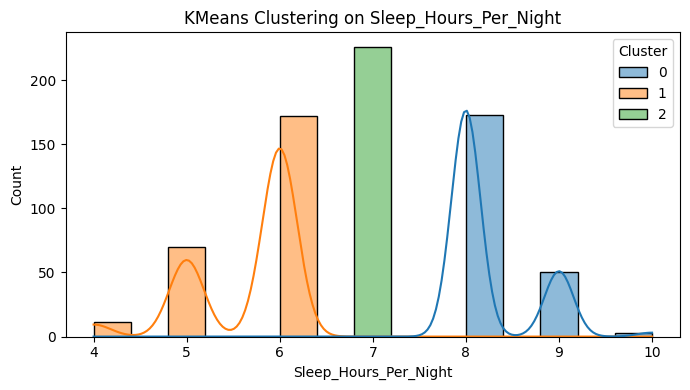

------------------------------------------------------------
🔍 Comparing 'Mental_Health_Score' by 'Relationship_Status'


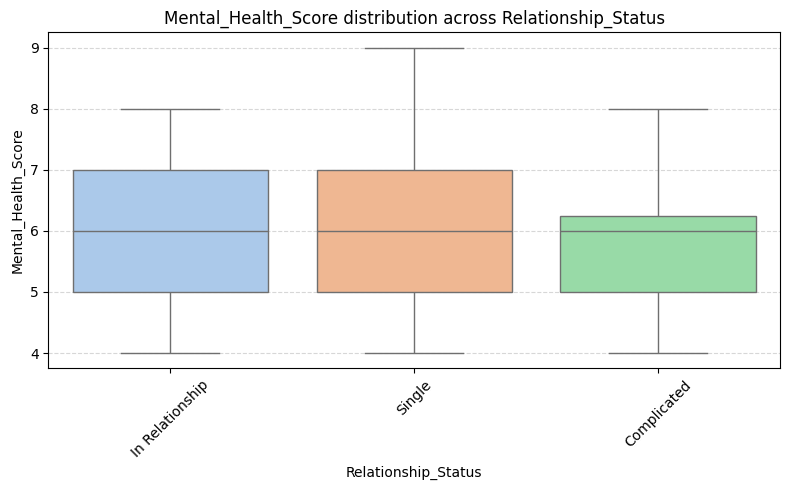

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 55.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 61.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 65.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 65.9% of the points cannot be plac

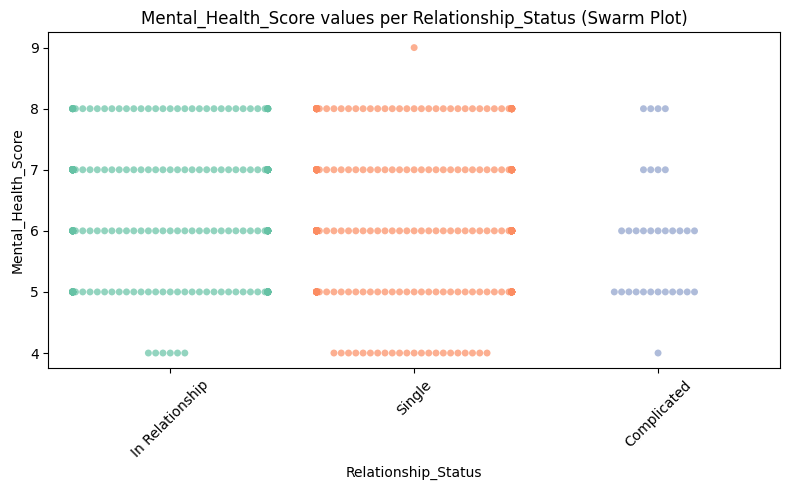

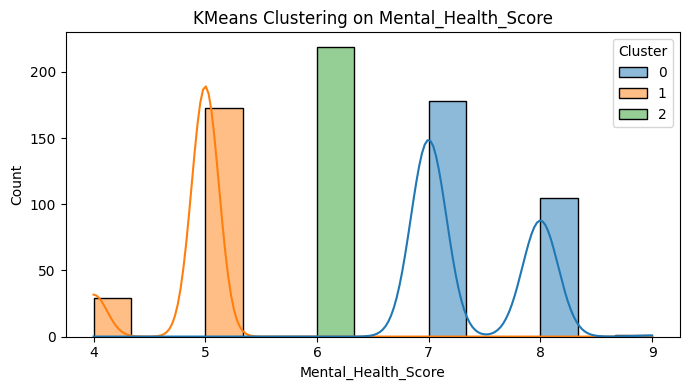

------------------------------------------------------------
🔍 Comparing 'Conflicts_Over_Social_Media' by 'Relationship_Status'


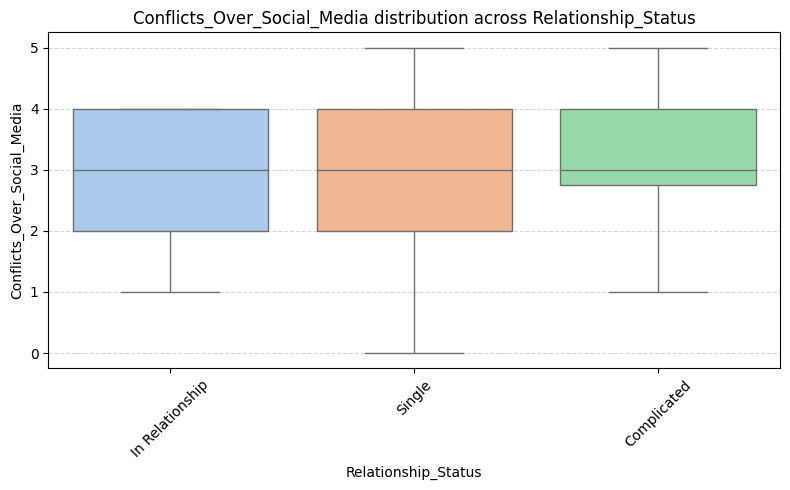

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 63.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 67.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 67.2% of the points cannot be plac

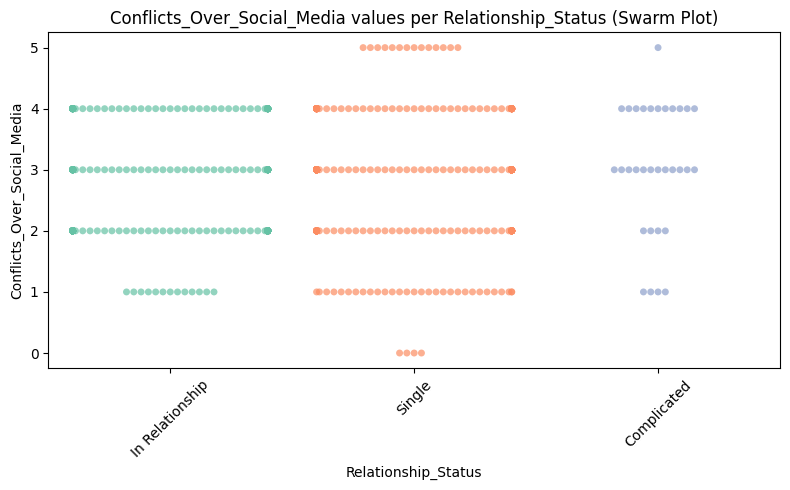

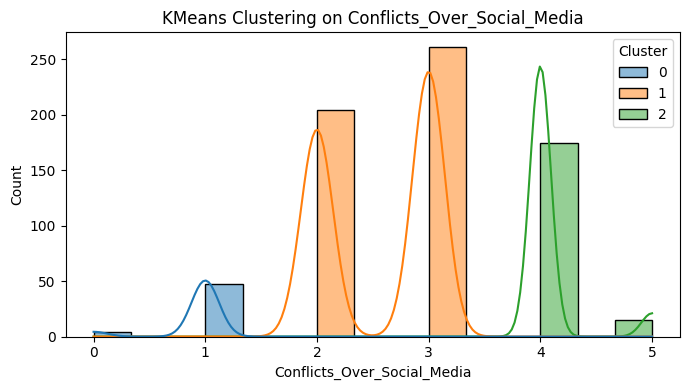

------------------------------------------------------------


In [61]:
# Loop through all categorical + numerical combinations
for cat in columns_to_compare_categorical:
    for num in columns_to_compare_numerical:
        compare_cat_num(df_copy, cat, num)


# FEATURE ENGINEERING

In [ ]:
df.head(0)

Empty DataFrame
Columns: [Student_ID, Age, Gender, Academic_Level, Country, Avg_Daily_Usage_Hours, Most_Used_Platform, Affects_Academic_Performance, Sleep_Hours_Per_Night, Mental_Health_Score, Relationship_Status, Conflicts_Over_Social_Media, Addicted_Score]
Index: []

In [ ]:
X = df.drop("Addicted_Score", axis=1)
y = df["Addicted_Score"]

In [ ]:
X.head()

Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Social_Media  
0                    6     In Relationship                            3  
1                    8              Single                            0  
2                    5         Complicated                            4  
3                    7              Single                            1  
4                    6     In Relationship                            2

In [ ]:
 y.head()

0    8
1    3
2    9
3    4
4    7
Name: Addicted_Score, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1200)

In [ ]:
# Install libs
!pip install category_encoders
!pip install scikit-learn==1.7

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 97.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [ ]:
# import libs
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold,  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
preprossesor = ColumnTransformer(
    transformers=[
        ("cat", TargetEncoder, categorical_cols),
        ("num", StandardScaler)
    ]
)

In [ ]:
pipeline = Pipeline([
    ("target_encoder", TargetEncoder(cols=categorical_cols)),  # No need to wrap again in []
    ("scale", StandardScaler()),
    ("lasso", Lasso(max_iter=10000))
])

In [ ]:
# Define parameter grid using geomspace
param_grid = {
    'lasso__alpha': np.geomspace(0.001, 10, num=10)  # 10 values from 0.001 to 10
}

# Kfold
cv_strategy = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
scoring = {
    'r2': 'r2',
    'neg_mse': 'neg_mean_squared_error',
    'neg_mae': 'neg_mean_absolute_error',
    'explained_var': 'explained_variance'
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring=scoring,
    refit="r2"
)

In [ ]:
# Fit
grid_search = grid.fit(X_train, y_train)
# Evaluate
print("Best R2 on training data:", grid_search.best_score_)
print("Best alpha:", grid_search.best_params_)
print("R2 on test set:", grid_search.score(X_test, y_test))

Best R2 on training data: 0.9623207987715858
Best alpha: {'lasso__alpha': np.float64(0.001)}
R2 on test set: 0.9577553483770829


In [ ]:
df.drop("Student_ID", axis=1)